<h1>Aggregate all 30 stocks in the DJIA</h1>

In [756]:
DJIA_STOCKS = ['MSFT', 'AAPL', 'AMZN', 'JPM', 'WMT', 'V', 'UNH', 'PG', 'JNJ', 'HD', 'MRK', 'CVX', 'KO', 'CRM', 'CSCO', 'MCD', 'DIS', 'VZ', 'AXP', 'AMGN', 'CAT', 'IBM', 'GS', 'HON', 'INTC', 'NIKE', 'BA', 'MMM', 'TRV', 'DOW']
len(DJIA_STOCKS) == 30
# No pruning of data needed.

True

<h2>Yahoo Finance does not require an api key!</h2>
<b>Run this cell once, then all of the data will be saved in a pickle (and csv files)!</b>

In [757]:
import yfinance as yf
import pickle
import os

stock_market_cap = {}
stock_data = {}

if 'DJIA Historical Data' not in os.listdir():
    os.mkdir('DJIA Historical Data')

    for stock in DJIA_STOCKS:
        ticker_data = yf.Ticker(stock)
        hist = ticker_data.history(period='max')
    
        hist.to_csv(f'DJIA Historical Data/{stock}.csv')
        stock_data[stock] = hist
        if 'marketCap' in ticker_data.info:
            stock_market_cap[stock] = ticker_data.info['marketCap']
        else:
            print(f'{stock} DOES NOT HAVE MARKET CAP DATA.')
else:
    print("DJIA Historical Data already pulled.")


if 'stock_ohlcv.pkl' not in os.listdir():
    pickle.dump(stock_data, open('stock_ohlcv.pkl', 'wb'))
else:
    print("DJIA's OHLCV Data already pickled.")


if 'stock_market_cap.pkl' not in os.listdir():
    pickle.dump(stock_market_cap, open('stock_market_cap.pkl', 'wb'))
else:
    print("DJIA's Market Cap Data already pickled.")

print("DONE!")

DJIA Historical Data already pulled.
DJIA's OHLCV Data already pickled.
DJIA's Market Cap Data already pickled.
DONE!


<h1>Once you download all of the DJIA data, always load the data here!</h1>

In [758]:
djia_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
djia_market_cap = pickle.load(open('stock_market_cap.pkl', 'rb'))

<h1>Remove all stocks with no entries.</h1>

In [759]:
for stock in DJIA_STOCKS:
    if len(djia_data[stock]) <= 0:
        DJIA_STOCKS.remove(stock)
print(f'STOCKS IN DJIA CURRENTLY: {len(DJIA_STOCKS)}')

STOCKS IN DJIA CURRENTLY: 29


<H1>Calculate 1M, 6M, 2Y, and ALL-TIME volatility, average price, increasing days, and decreasing days.</H1>

In [760]:
import numpy as np
import datetime as dt
from pandas import DatetimeIndex
today = np.datetime64('2024-07-06', 'ns')

In [761]:
import pandas as pd
import math
pd.set_option('display.width', 200) 

temp_djia_data = {}
summary_statistics = pd.DataFrame(index=DJIA_STOCKS)

#temp = []
for stock in DJIA_STOCKS:
    df = djia_data[stock]
    df.index = df.index.tz_localize(None)
    df = df.reset_index()
    temp_djia_data[stock] = df
    #temp_df = df[df['Date'] > today - np.timedelta64(7, 'D')]
    #temp_df = temp_df.reset_index()
    #print(temp_df)
    #df[date] = df[df['Date'] > today]
    #print(df)
temp_stats = {}
for stock in DJIA_STOCKS: #1M Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['1M Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 1M Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['1M Avg. Close'] = temp_stats
temp_stats = {}



temp_stats1 = {}
for stock in DJIA_STOCKS: #1M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['1M Inc. Days'] = temp_stats
summary_statistics['1M Dec. Days'] = temp_stats1

temp_stats = {}
for stock in DJIA_STOCKS: #6M Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['6M Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 6M Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['6M Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #6M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['6M Inc. Days'] = temp_stats
summary_statistics['6M Dec. Days'] = temp_stats1



temp_stats = {}
for stock in DJIA_STOCKS: #2Y Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['2Y Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 2Y Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['2Y Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #6M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['2Y Inc. Days'] = temp_stats
summary_statistics['2Y Dec. Days'] = temp_stats1




temp_stats = {}
for stock in DJIA_STOCKS: #ALL-TIME Volatility
    df = temp_djia_data[stock]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['ALL-TIME Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # ALL-TIME Average Price
    df = temp_djia_data[stock]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['ALL-TIME Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #ALL-TIME Increasing & Decreasing Days
    df = temp_djia_data[stock]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['ALL-TIME Inc. Days'] = temp_stats
summary_statistics['ALL-TIME Dec. Days'] = temp_stats1

print(summary_statistics)

       1M Vol.  1M Avg. Close  1M Inc. Days  1M Dec. Days   6M Vol.  6M Avg. Close  6M Inc. Days  6M Dec. Days   2Y Vol.  2Y Avg. Close  2Y Inc. Days  2Y Dec. Days  ALL-TIME Vol.  \
MSFT  2.626514     445.962001            18             1  1.708001     414.842490            70            56  3.036538     322.254734           261           239       0.903777   
AAPL  1.900753     210.983000            18             1  1.261706     185.132007            67            59  0.894156     169.493257           263           237       0.428827   
AMZN  1.346333     189.571500            14             5  1.066291     176.382598            69            57  1.372040     133.238743           261           239       0.644531   
JPM   1.094499     197.975735            13             6  1.010656     187.254909            72            54  1.257126     145.901219           280           220       0.387759   
WMT   0.207225      67.586000            13             6  0.406365      60.246428        

In [762]:
for a in summary_statistics:
    print(f'{a}:\n{summary_statistics[a]}')
    print('\n\n')

1M Vol.:
MSFT    2.626514
AAPL    1.900753
AMZN    1.346333
JPM     1.094499
WMT     0.207225
V       0.992567
UNH     1.510476
PG      0.378983
JNJ     0.232485
HD      1.889401
MRK     0.511576
CVX     0.401932
KO      0.130718
CRM     2.304636
CSCO    0.169357
MCD     0.806884
DIS     0.353463
VZ      0.146813
AXP     0.900182
AMGN    1.325442
CAT     0.585469
IBM     0.617573
GS      1.598031
HON     0.550804
INTC    0.081463
BA      1.145815
MMM     0.234298
TRV     0.727012
DOW     0.314692
Name: 1M Vol., dtype: float64



1M Avg. Close:
MSFT    445.962001
AAPL    210.983000
AMZN    189.571500
JPM     197.975735
WMT      67.586000
V       271.886502
UNH     490.952795
PG      166.533999
JNJ     146.582500
HD      341.700500
MRK     129.146856
CVX     155.703001
KO       63.191296
CRM     244.235001
CSCO     46.184315
MCD     254.587000
DIS     100.739999
VZ       40.645000
AXP     229.652054
AMGN    308.005501
CAT     327.785500
IBM     171.955001
GS      455.186497
HON     211.8

<h1>Calculating returns then store in a pickle</h1>
<b>This will take a while if running first time (and is not pickled)...</b>

In [763]:
if 'djia_returns.pkl' not in os.listdir():
    djia_returns = {}
    print("START")
    for i,stock in enumerate(DJIA_STOCKS):
        print(f'{(i+1)/len(DJIA_STOCKS) * 100}%-\t{stock}')
        temp_data = []
        df = djia_data[stock]
    
        last_close = None
        skippedFirst = False
        for row in df.iloc:
            close = row['Close']
            if not skippedFirst:
                skippedFirst = True
                last_close = close
                temp_data.append(0)
                continue
            temp_data.append(close / last_close - 1)
            last_close = close
        djia_returns[stock] = pd.DataFrame({'Date': df.index, 'Return': temp_data})
    
    #df_returns = pd.DataFrame(djia_returns)
    
    pickle.dump(djia_returns, open('djia_returns.pkl', 'wb'))
else:
    print(f'"djia_returns.pkl" ALREADY EXISTS.')

print('DONE')
    

"djia_returns.pkl" ALREADY EXISTS.
DONE


<h1>Unpickle djia_returns.pkl</h1>

In [764]:
djia_returns = pickle.load(open('djia_returns.pkl', 'rb'))

<h1>RUN THIS TO PLOT ALL RETURNS!</h1>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


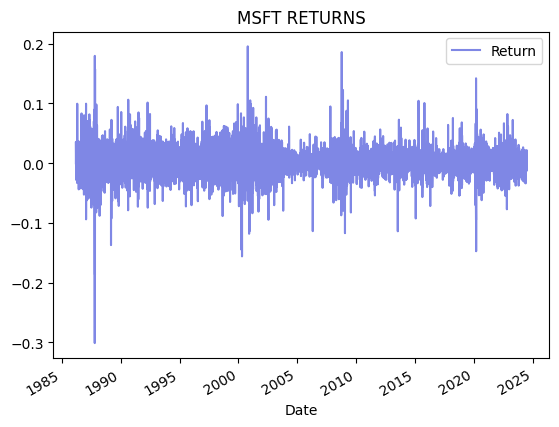

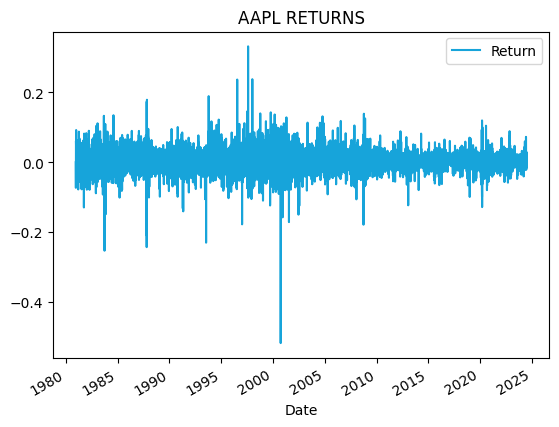

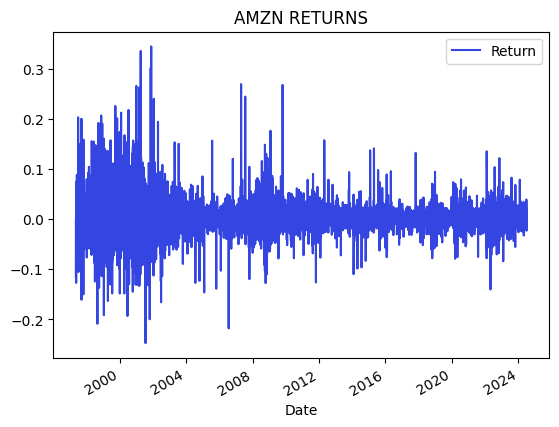

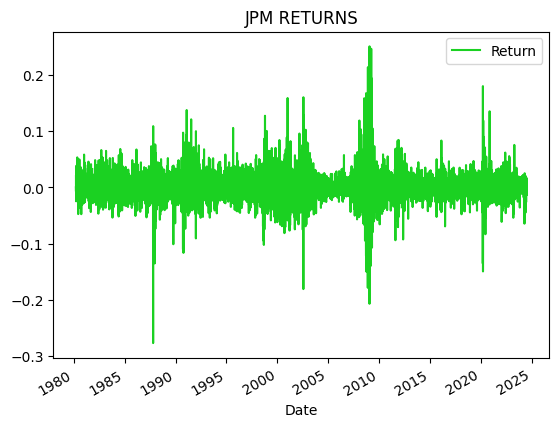

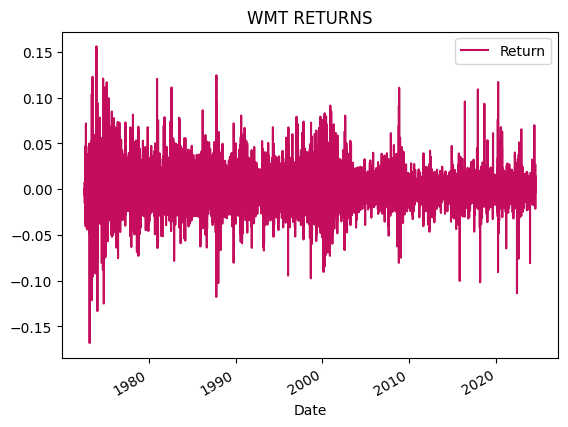

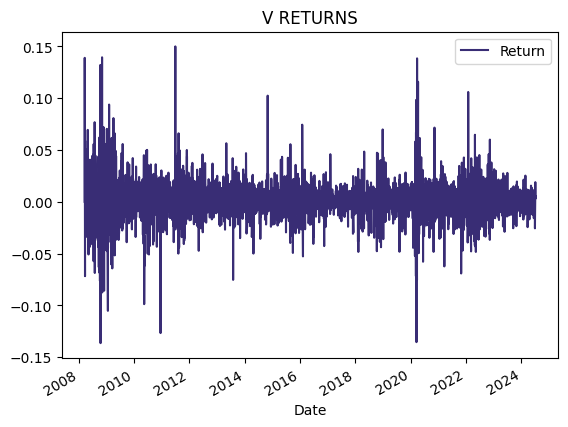

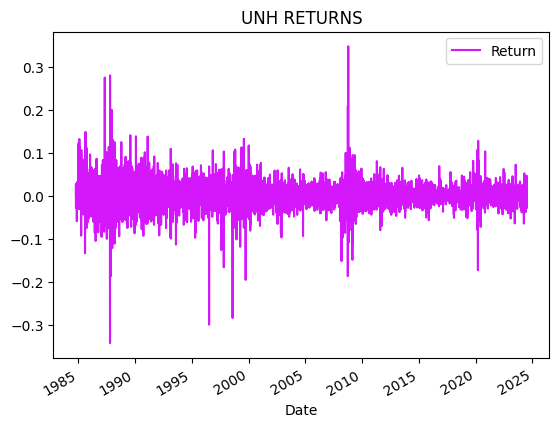

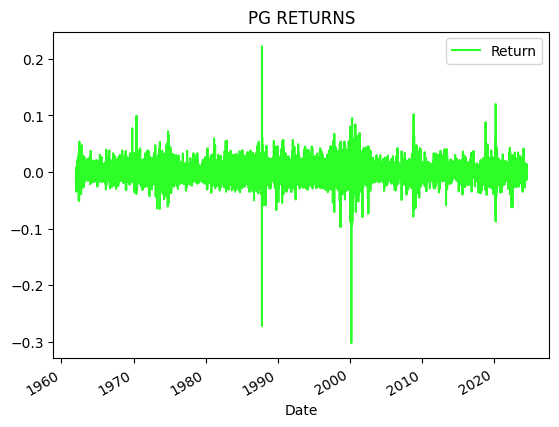

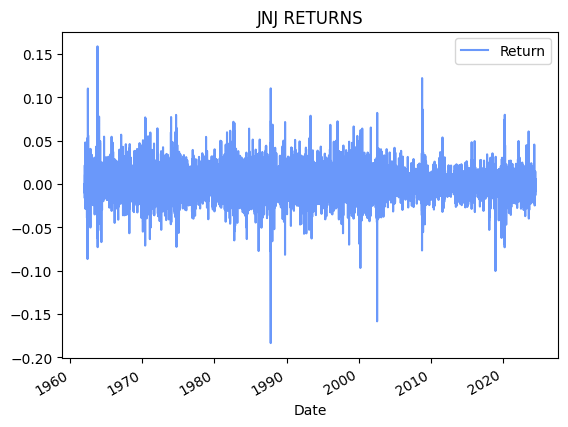

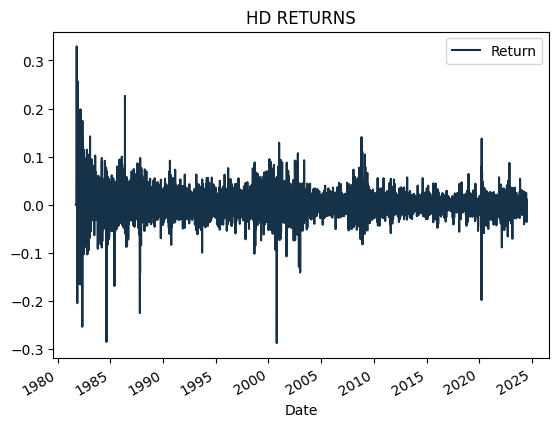

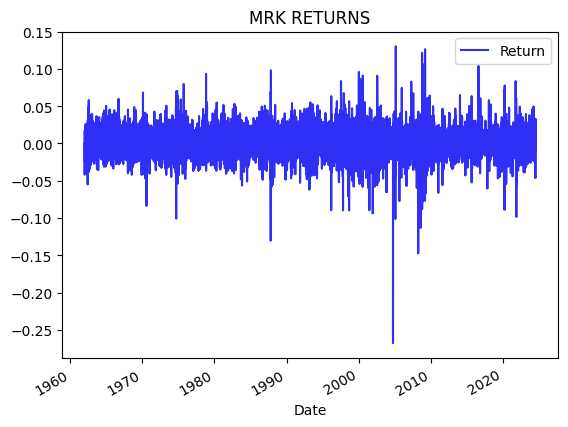

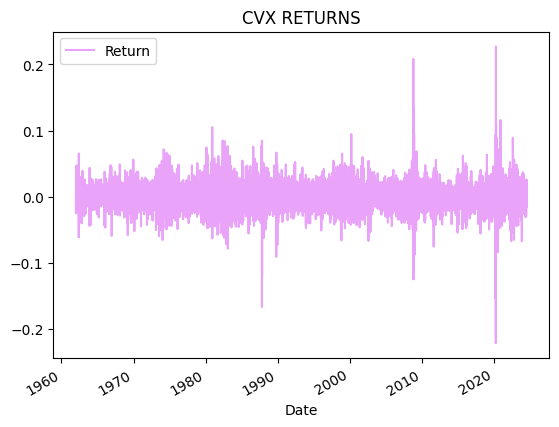

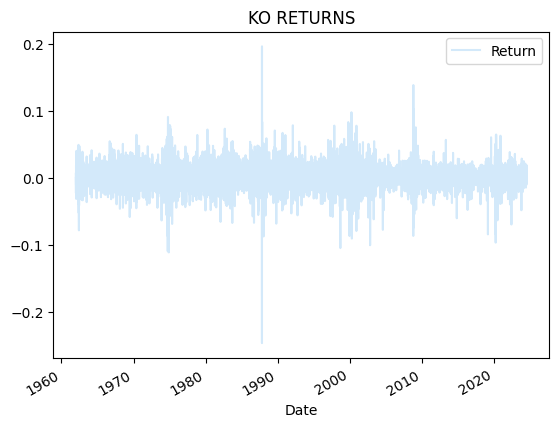

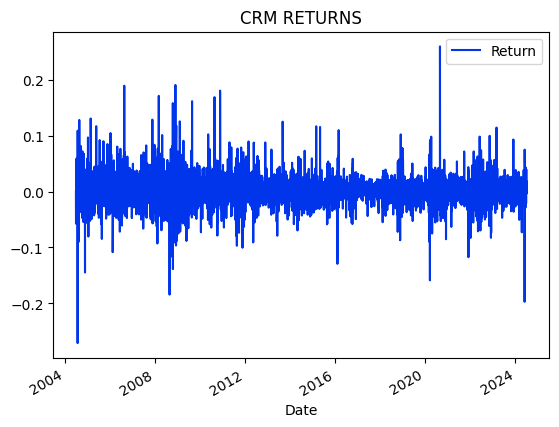

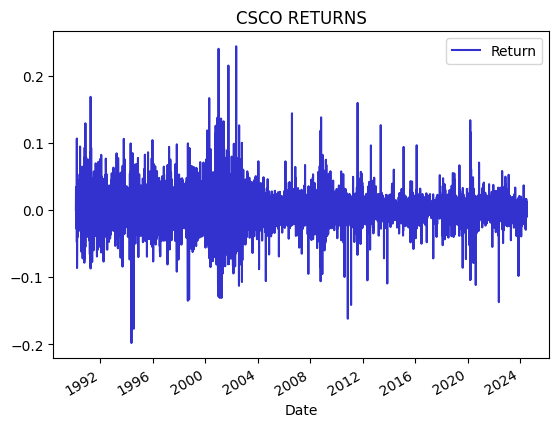

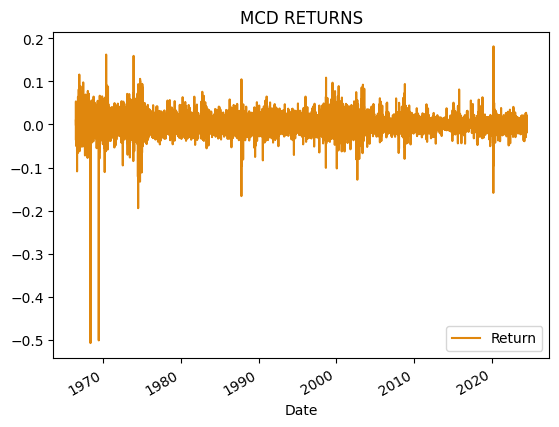

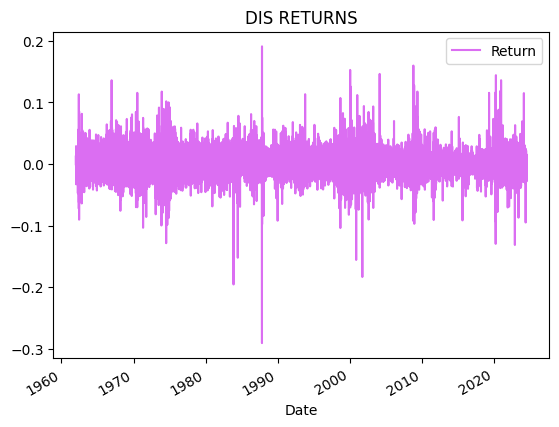

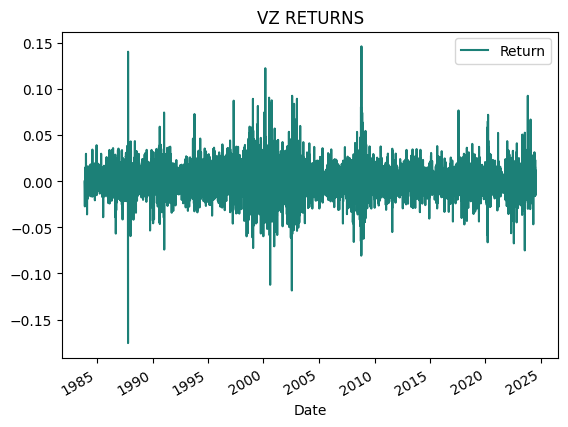

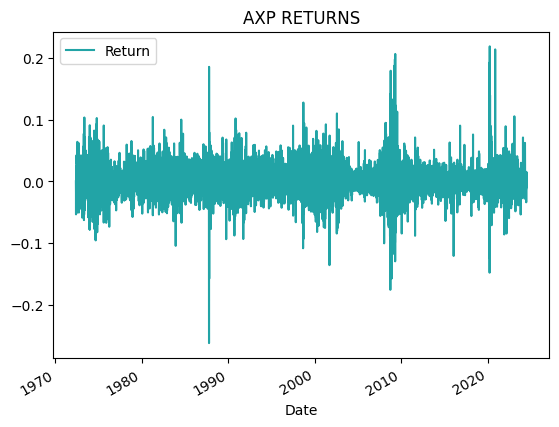

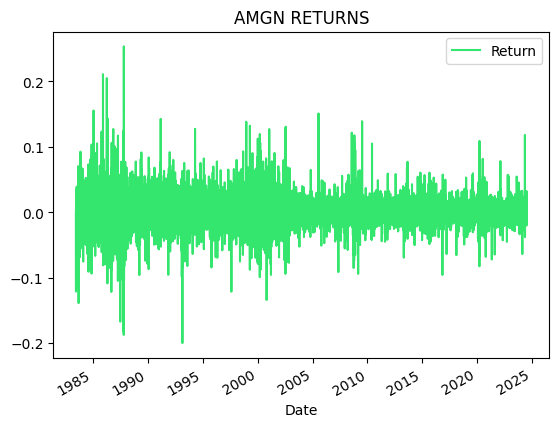

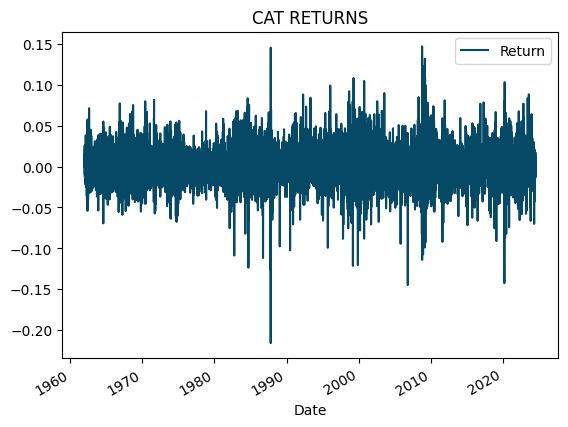

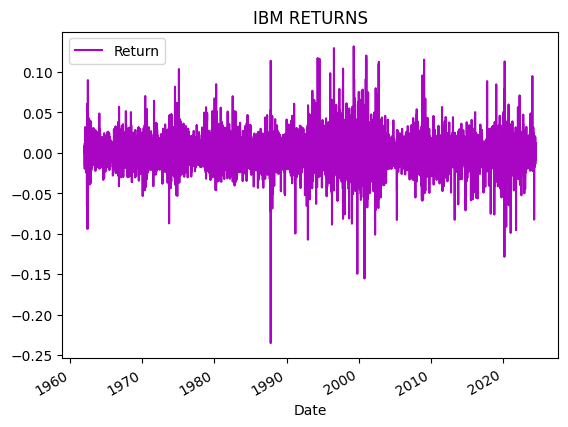

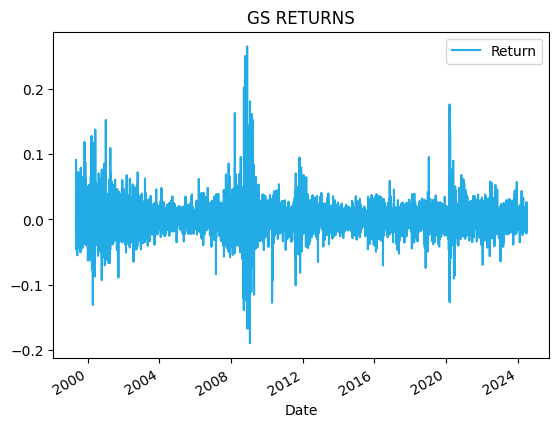

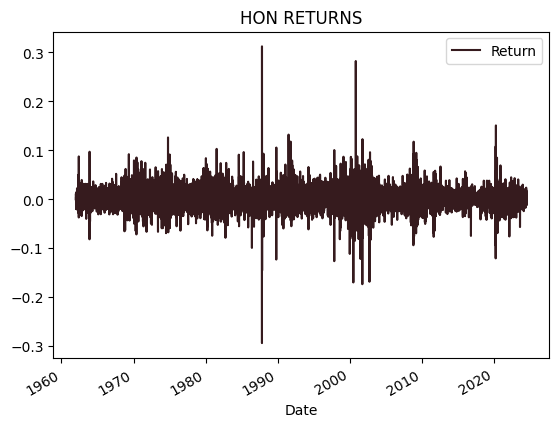

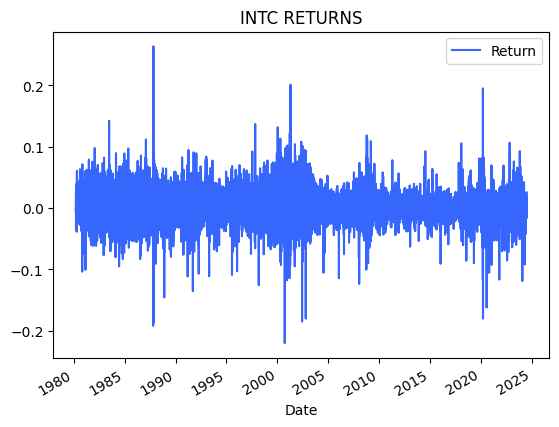

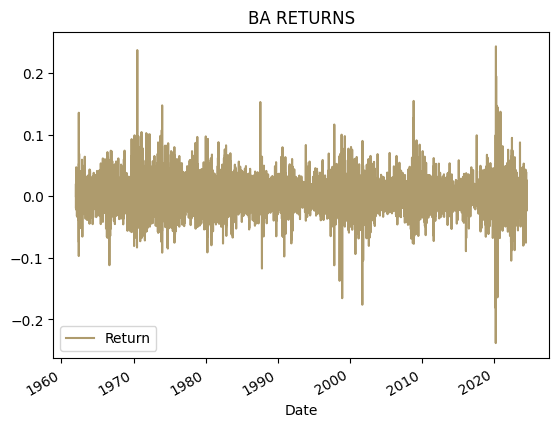

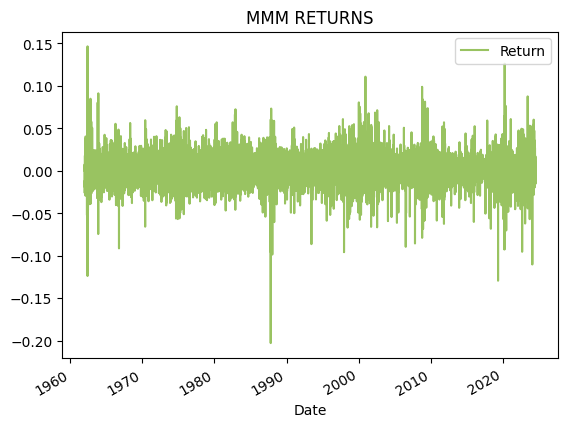

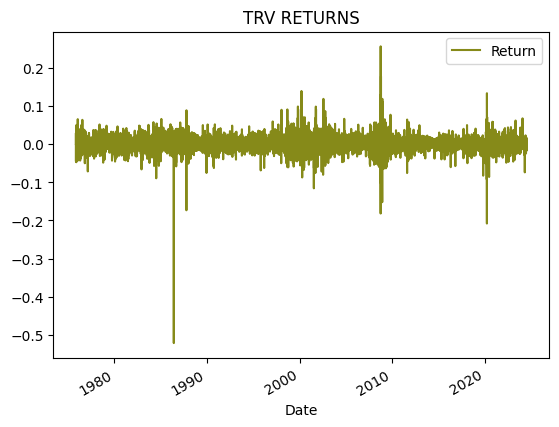

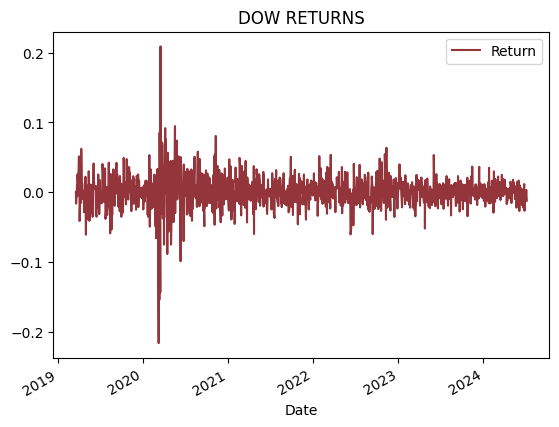

In [765]:
#djia_returns['AAPL'].plot(x='Date', y='Return')
import random
for stock in djia_returns:
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    djia_returns[stock].plot(x='Date', y='Return', title=f'{stock} RETURNS', color=color)

<h1>Creating CORR matrix (from returns)</h1>

In [766]:
import matplotlib.pyplot as plt
# We want 7,300 days worth of data (20 yrs)
return_eligible_stocks = {}

for stock in djia_returns:
    if len(djia_returns[stock]) > 365*20: # this is not precise because there are not 365 trading days/year but it will get the job done, and it is an underestimate so it won't cause out-of-bounds exceptions
        return_eligible_stocks[stock] = None
print(return_eligible_stocks)
print(f'Eligible stocks: {len(return_eligible_stocks)}')

first_date = today - np.timedelta64(365*20, 'D')

df_list = []

for stock in return_eligible_stocks:
    df = djia_returns[stock]
    df = df[df['Date'] > first_date]
    df = df.set_index('Date')
    df = df.rename(columns={"Return": f"{stock} Returns"})
    df_list.append(df)

return_matrix = pd.concat(df_list, axis=1).sort_index()
#return_marix = return_matrix[return_matrix['Date'] > first_date]
#print(return_matrix)


{'MSFT': None, 'AAPL': None, 'JPM': None, 'WMT': None, 'UNH': None, 'PG': None, 'JNJ': None, 'HD': None, 'MRK': None, 'CVX': None, 'KO': None, 'CSCO': None, 'MCD': None, 'DIS': None, 'VZ': None, 'AXP': None, 'AMGN': None, 'CAT': None, 'IBM': None, 'HON': None, 'INTC': None, 'BA': None, 'MMM': None, 'TRV': None}
Eligible stocks: 24


<h1>3 Month Correlation Matrix</h1>

In [767]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(90, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

<h1>1 Year Correlation Matrix</h1>

In [768]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(365*1, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

<h1>5 Year Correlation Matrix</h1>

In [769]:
curr_matrix = return_matrix.reset_index()



curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(365*5, 'D')]
curr_matrix.set_index('Date')
curr_matrix = curr_matrix.drop('Date', axis = 1)
corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')


In [770]:
# Need latex code for table

with open('5yearcorrmatrix.tex', 'w') as f:
    f.write(corr.style.to_latex()) 

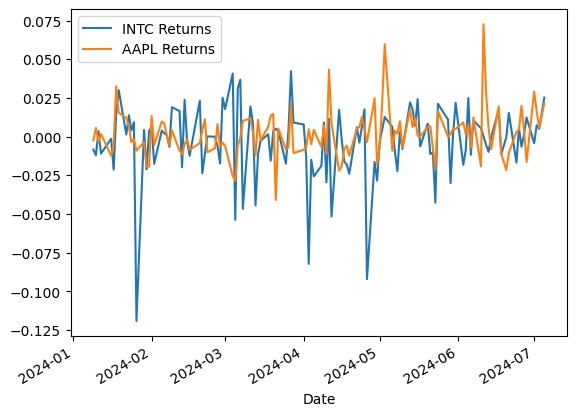

In [771]:
tech_stocks = ['MSFT', 'AAPL', 'CSCO', 'IBM', 'AMZN', 'INTC', 'VZ']
tech_stocks = ['INTC', 'AAPL']
financial_stocks = ['AXP', 'GS', 'JPM', 'TRV', 'V']
consumergoods_stocks = ['HD', 'KO', 'MCD', 'PG', 'WMT']
medical_stocks = ['AMGN', 'JNJ', 'MRK', 'UNH']
ax = None
for stock in tech_stocks:
    df = djia_returns[stock]
    
    df = df.reset_index()
    df = df[df['Date'] > today - np.timedelta64(180, 'D')]
    df.set_index('Date')
    df = df.rename(columns={"Return": f"{stock} Returns"})
    if ax is None:
        ax = df.plot(x='Date', y=f"{stock} Returns")
    else:
        df.plot(x='Date', y=f"{stock} Returns", ax=ax)

# NOT FINISHED YET

<h1>Constructing Momentum</h1>

In [772]:
timedelta_list = { #timedelta_list keys must ALL MATCH mom_list keys FOUND HERE
    '3M': pd.Timedelta(days=91), # closest multiple of 7, makes stuff EZ. 3M (3 month)
    '6M': pd.Timedelta(days=182), # closest multiple of 7, makes stuff EZ. 6M (6 month)
    '12M': pd.Timedelta(days=364), # closest multiple of 7, makes stuff EZ. 12M (12 months)
}

mom_list = { #timedelta_list keys must ALL MATCH mom_list keys FOUND HERE
    '3M': {},
    '6M': {},
    '12M': {} 
}
print("START")

for stock in temp_djia_data:
    if 'mom_list.pkl' in os.listdir():
        print('mom_list.pkl found, skipping momentum calculations.')
        break
    for timeframe in timedelta_list:
        stock_data = temp_djia_data[stock]
        timedelta = timedelta_list[timeframe]
        
        init_date = stock_data.iloc[0]['Date'] + timedelta
        #print(init_date)
        
        idx = stock_data[stock_data['Date'] == init_date].index
        if len(idx) == 0: # this fixes the case where the the init_date is on a non-tradeable day, shifting it two days forward usually fixes this
            init_date = stock_data.iloc[2]['Date'] + timedelta
        idx = stock_data[stock_data['Date'] == init_date].index
        
        mom_listed_data = []
        while idx < len(stock_data):
            curr_row = stock_data.iloc[idx[0]]
            lag_date = curr_row['Date'] - timedelta
            #print(lag_date)
            lag_data = stock_data[stock_data['Date'] == lag_date]
            
            if len(lag_data) == 0:
                idx += 1
                continue
            #print(f"{curr_row['Date']}\t{curr_row['Close']}\t{lag_data.iloc[0]['Close']}")
            momentum = ( (curr_row['Close'] / lag_data.iloc[0]['Close']) - 1)
            
            mom_listed_data.append((curr_row['Date'], momentum))
            idx += 1
        mom_list[timeframe][stock] = pd.DataFrame(mom_listed_data,columns=['Date', f'{timeframe}-Mom'])
        print(f'Finished {stock} {timeframe}')

mom_list['12_to_1'] = {}
mom_12_to_1 = {}
for stock in temp_djia_data: # want to do 
    if 'mom_list.pkl' in os.listdir():
        print('mom_list.pkl found, skipping momentum calculations.')
        break
    mom_list['12_to_1'][stock] = []
    #if 'mom_list.pkl' in os.listdir():
        #break

    stock_data = temp_djia_data[stock]
    idx = -1

    timeDelta = pd.Timedelta(days=28)
    oneDayDelta = pd.Timedelta(days=1)
    dayDeltaLimit = 4
    
    while -idx < len(stock_data):
        curr_date = stock_data.iloc[idx]['Date']
        init_calc_date = curr_date - timeDelta

        dayDeltaPos = 0
        while len(stock_data[stock_data['Date'] == init_calc_date]) == 0:
            init_calc_date -= oneDayDelta
            if dayDeltaPos > dayDeltaLimit:
                break
            dayDeltaPos += 1

        lag_date = init_calc_date - pd.Timedelta(days=364) # closest timedate multiple of 7 for 12 months
        dayDeltaPos = 0
        while len(stock_data[stock_data['Date'] == lag_date]) == 0:
            lag_date -= oneDayDelta
            if dayDeltaPos > dayDeltaLimit:
                break
            dayDeltaPos += 1
        
        init_calc_row = stock_data[stock_data['Date'] == init_calc_date]
        lag_row = stock_data[stock_data['Date'] == lag_date]

        if len(lag_row) == 0:
            break
        
        momentum = ( (init_calc_row.iloc[0]['Close'] / lag_row.iloc[0]['Close']) - 1)
        mom_list['12_to_1'][stock].append((curr_date, momentum))
        idx -= 1
    print(f'{stock} 12-to-1-MOM FINISHED')
    mom_list['12_to_1'][stock] = pd.DataFrame(mom_list['12_to_1'][stock], columns=['Date', '12to1-Mom'])


#

if 'mom_list.pkl' not in os.listdir():
    pickle.dump(mom_list, open('mom_list.pkl', 'wb')) # lets pickle this, because this takes too long to do EVERY time I load jupyter :)
print("DONE")

    


START
mom_list.pkl found, skipping momentum calculations.
mom_list.pkl found, skipping momentum calculations.
DONE


In [773]:
#mom_3M_list['AAPL']['Mom-3M']

#print(idx)

assert 'mom_list.pkl' in os.listdir()
mom_list = pickle.load(open('mom_list.pkl', 'rb'))
for timeframe in mom_list:
    for stock in mom_list[timeframe]:
        print(f'{timeframe} {stock} {len(mom_list[timeframe][stock])}')


3M MSFT 9260
3M AAPL 10544
3M AMZN 6522
3M JPM 10726
3M WMT 12568
3M V 3895
3M UNH 9601
3M PG 15121
3M JNJ 15121
3M HD 10354
3M MRK 15121
3M CVX 15121
3M KO 15121
3M CRM 4803
3M CSCO 8295
3M MCD 14026
3M DIS 15121
3M VZ 9821
3M AXP 12625
3M AMGN 9928
3M CAT 15121
3M IBM 15121
3M GS 6044
3M HON 15121
3M INTC 10726
3M BA 15121
3M MMM 15121
3M TRV 11782
3M DOW 1224
6M MSFT 9206
6M AAPL 10493
6M AMZN 6464
6M JPM 10674
6M WMT 12520
6M V 3837
6M UNH 9548
6M PG 15063
6M JNJ 15063
6M HD 10303
6M MRK 15063
6M CVX 15063
6M KO 15063
6M CRM 4745
6M CSCO 8240
6M MCD 13967
6M DIS 15063
6M VZ 9769
6M AXP 12575
6M AMGN 9875
6M CAT 15063
6M IBM 15063
6M GS 5986
6M HON 15063
6M INTC 10674
6M BA 15063
6M MMM 15063
6M TRV 11732
6M DOW 1165
12M MSFT 9239
12M AAPL 10542
12M AMZN 6460
12M JPM 10728
12M WMT 12600
12M V 3784
12M UNH 9585
12M PG 15170
12M JNJ 15170
12M HD 10352
12M MRK 15170
12M CVX 15170
12M KO 15170
12M CRM 4711
12M CSCO 8260
12M MCD 14062
12M DIS 15170
12M VZ 9809
12M AXP 12659
12M AMGN 9917

Text(0.5, 1.0, '15 Year Momentum Graph')

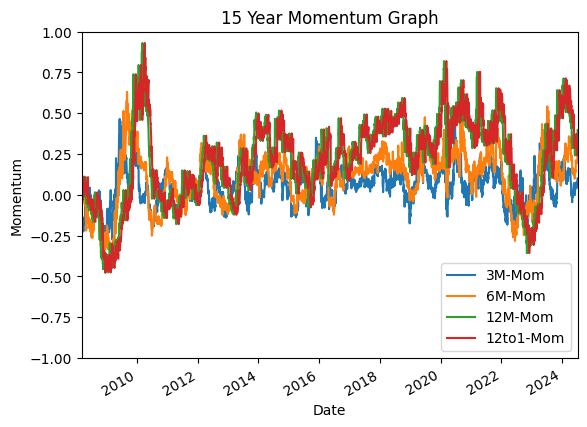

In [774]:
ax = None
limit = 5
i = 0
for timeframe in mom_list:
    if i > limit:
        break
    i+=1
    df = mom_list[timeframe]['MSFT']
    tf_tag = df.columns[1]
    if ax is None:
        ax = df.plot(x='Date', y=tf_tag)
    else:
        df.plot(x='Date', y=tf_tag, ax=ax)


ax.set_xlim(temp_djia_data['MSFT'].iloc[0]['Date'] + pd.Timedelta(days=365*22), temp_djia_data['MSFT'].iloc[-1]['Date'])
ax.set_ylim(-1,1)
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.title('15 Year Momentum Graph')

<h1>Backtesting!</h1>
<h1>We will assign equal weightings to each of stock in the top 3rd of Momentum Signals</h1>
<h2>From June 1963 to November 2012, there are roughly 21 trading days per month</h2>

In [458]:
from datetime import datetime, timedelta

stock_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
def calculate_monthly_rebalancing_returns(mom_streams):
    #mom_streams
    '''
    df = pd.DataFrame(columns=['Date', 'Returns'])
    # lets start backtest from June 1963 
    
    init_date = '1963-06-03'
    for stock in temp_mom_streams:
        temp_df = temp_mom_streams[stock]
        temp_df = temp_df[temp_df['Date'] >= init_date].reset_index(drop=True)
        temp_mom_streams[stock] = temp_df
    '''
    
    #return_streams_df = {stock: None for stock in temp_mom_streams}
    trading_strat_date = []
    trading_strat_returns = []

    end_date = datetime.strptime('2012-11-30', '%Y-%m-%d')
    
    current_date = datetime.strptime('1963-06-03', '%Y-%m-%d')
    
    trading_strat_date.append(current_date)
    trading_strat_returns.append(1.00)

    mom_tag = mom_streams['AAPL'].columns[1]

    last_top_3rd = []
    last_top_3rd_prices = {}
    last_top_3rd_date = None

    while end_date > current_date:


        current_stocks_mom = {}
        no_info_count = 0

        for stock in mom_streams:
            temp_df = mom_streams[stock]
            if len(temp_df[temp_df['Date'] == current_date]) == 0:
                no_info_count += 1
            else:
                current_stocks_mom[stock] = temp_df[temp_df['Date'] == current_date].iloc[0][mom_tag]
                
        #print(no_info_count)
        if no_info_count >= 24:
            current_date += timedelta(days=1)
            continue



        
        if last_top_3rd_prices:
            curr_prices = {stock: None for stock in last_top_3rd_prices}
            for stock in curr_prices:
                tdf = stock_data[stock].reset_index()
                curr_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])

                #print(f'last {stock} price: {last_top_3rd_prices[stock]}')
                #print(f'curr {stock} price: {curr_prices[stock]}')
                
                
            return_stocks = {stock: None for stock in last_top_3rd_prices}
            for stock in return_stocks:
                return_stocks[stock] = (curr_prices[stock] / last_top_3rd_prices[stock]) - 1

            trading_strat_date.append(current_date)

            total_returns = 0

            for stock in return_stocks:
                total_returns += ( 1/len(return_stocks) ) * return_stocks[stock]

            #trading_strat_returns.append( (total_returns + 1) * (trading_strat_returns[-1]) )
            trading_strat_returns.append( (total_returns + 1) )

            #print(f'return_stocks: {return_stocks}')
            #print(total_returns)
            
            

            last_top_3rd = []
            last_top_3rd_prices = {}
            last_top_3rd_date = None

        top_3rd_stocks = []
        temp_sorted_dict = dict(sorted(current_stocks_mom.items(), key=lambda item: item[1]))
        stocks_to_pop = []
        for stock in temp_sorted_dict:
            if temp_sorted_dict[stock] < 0:
                stocks_to_pop.append(stock)

        for stock in stocks_to_pop:
            temp_sorted_dict.pop(stock)

        ascending_mom_stocks = list(temp_sorted_dict.keys())
        #print(ascending_mom_stocks)
        count_of_stocks = len(ascending_mom_stocks)

        for _ in range(count_of_stocks - count_of_stocks // 3):
            ascending_mom_stocks.pop(0)
            
        last_top_3rd = ascending_mom_stocks
        last_top_3rd_date = current_date
        for stock in last_top_3rd:
            tdf = stock_data[stock].reset_index()
            last_top_3rd_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])
            
        #print(last_top_3rd)
        #print(last_top_3rd_date)
        #print(last_top_3rd_prices)
        
        current_date += timedelta(days=31)

    tdf = pd.DataFrame({'Date': trading_strat_date, 'Returns': trading_strat_returns})
    return tdf

In [459]:

trading_strat_returns = {mom_strat: calculate_monthly_rebalancing_returns(mom_list[mom_strat]) for mom_strat in mom_list}

    
#a = calculate_monthly_rebalancing_returns(mom_list['3M'])

#print(a['AAPL'])

<h1>Let's take a look at the index when $1,000 is invested starting in 1963</h1>

3M Returns: 21068.150458471035
6M Returns: 34018.23347252393
12M Returns: 209898.13199664414
12_to_1 Returns: 219137.1781114546


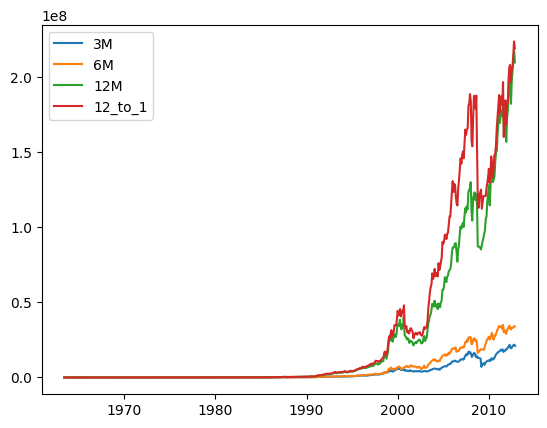

In [460]:

for strat in trading_strat_returns:
    strat_return_stream = trading_strat_returns[strat]
    print(f'{strat} Returns: {strat_return_stream["Returns"].cumprod().iloc[-1]}')
    strat_return_stream['1e3cp'] = strat_return_stream['Returns'].cumprod() * 1000
    plt.plot(strat_return_stream['Date'], strat_return_stream['1e3cp'], label=strat)
    plt.legend()
    #ax, fig = strat_return_stream.plot(x='Date', y='1e3cp')
    #strat_return_stream.info()

<h3>Calculating annualized <i>geometric</i> mean return</h3>
<h4>Take to the 1/yearcount power</h4>

In [808]:
def get_annualized_mean_return(trading_strat_return):
# from 06-1963 to 11-2012 is 59 years, 5 months which is 59.416667 years
    cumprod = 1
    for month in trading_strat_return.iloc:
        cumprod *= month['Returns']
    cumprod = cumprod ** (1/59.41667)
    #print(f'Annualized Rate of Return for {strat}: {cumprod-1}')
    return float(cumprod - 1)
#get_annualized_mean_return(trading_strat_returns['3M'])
   

<h1>Calculating annualized volatility</h1>
<h3>$$volatility_{annualized} = {variance}^{2} \sqrt{12} = \sqrt{12}\sigma$$</h3>

In [462]:
def get_annualized_vol(trading_strat_return):
    stddev = trading_strat_return['Returns'].std()
    #print(f'Annualized Volatility for {strat}: {stddev * (12 ** 0.5)}')
    return float(stddev * (12 ** 0.5))
get_annualized_vol(trading_strat_returns['3M'])

0.2537452444648006

<h1>Calculating Sharpe Ratio</h1>
$$S_a = \frac{\mu_{return}}{\sigma}$$

In [463]:
def get_sharpe_ratio(trading_strat_return):
    sharpe = (trading_strat_return['Returns'].cumprod().iloc[-1] ** (1/59.41667) - 1) / (trading_strat_return['Returns'].std())
    return float(sharpe)
get_sharpe_ratio(trading_strat_returns['3M'])
    #print(f'Sharpe Ratio for {strat}: {sharpe}')

2.490233716611292

<h1>Calculating hit rate</h1>
$$h = \frac{profitable\ months}{total\ months}$$

In [464]:
def get_hit_rate(trading_strat_return):
    hits = 0
    for month in trading_strat_return.iloc:
        if month['Returns'] > 1:
            hits += 1
    hit_rate = (hits - 1) / ( len(trading_strat_return) - 1)
    return hit_rate  
get_hit_rate(trading_strat_returns['3M'])
    #print(f'Hit rate for {strat}: {hit_rate}')

0.6077348066298343

<h1>Calculating max drawdown</h1>

In [849]:
def get_max_drawdown(trading_strat_return):
    
    #max_drawdown = 0
    tdf = trading_strat_return
    tdf_length = len(tdf)
    tdf['Reversed Returns'] = tdf['Returns'].values[::-1]
    #print(f'max numerator: {tdf["Returns"].cumprod()}')
    #print(f'max denominator (excl. -1): {tdf["Returns"].cumprod().cummax() }')
    max_drawdown = (tdf['Returns'].cumprod() / tdf['Returns'].cumprod().cummax() - 1)
    #print(f'Max drawdown for {strat}: {max_drawdown.min()}')
    idxmin = max_drawdown.idxmin()
    #print(tdf.iloc[idxmin])
    #plt.plot(tdf['Date'], tdf['Returns'].cumprod())
    #plt.axvline(tdf.iloc[idxmin]['Date'])
    #plt.xlim([datetime.strptime('1990-01-01', '%Y-%m-%d'), datetime.strptime('2012-01-01', '%Y-%m-%d')])
    return float(max_drawdown.min())

#tdf2 = trading_strat_returns['3M']
#plt.plot(tdf2['Date'], tdf2['Returns'].cumprod())
#plt.plot(tdf2[tdf2['Date'] > '2005-01-01']['Date'], tdf2[tdf2['Date'] > '2005-01-01']['Returns'].cumprod())
#print(tdf2[tdf2['Date'] >= '2009-01-08'])
get_max_drawdown(trading_strat_returns['3M'])


-0.590643218300285

<h2>Highest monthly gain per annum</h2
<h4>These calculations will start from the Jan-1964 until Jan-2012</h4>

In [466]:
#datetime.strptime('2012-11-30', '%Y-%m-%d')
def get_highest_monthly_gain(trading_strat_return):
    year = []
    highest_gain = []

    curr_year = 1964

    while curr_year <= 2012:
        year += [curr_year]
        tdf = trading_strat_return
        tdf = tdf[tdf['Date'] >= datetime.strptime(f'{curr_year}-01-01', '%Y-%m-%d')]
        tdf = tdf[tdf['Date'] <= datetime.strptime(f'{curr_year}-12-31', '%Y-%m-%d')]
        highest_gain += [tdf['Returns'].max()]
        curr_year += 1
    return pd.DataFrame({'year': year, 'Highest Monthly Gain': highest_gain})


<h2>Highest monthly loss per annum</h2
<h4>These calculations will start from the Jan-1964 until Jan-2012</h4>

In [467]:
#datetime.strptime('2012-11-30', '%Y-%m-%d')
def get_highest_monthly_loss(trading_strat_return):

    year = []
    highest_loss = []

    curr_year = 1964

    while curr_year <= 2012:
        year += [curr_year]
        tdf = trading_strat_return
        tdf = tdf[tdf['Date'] >= datetime.strptime(f'{curr_year}-01-01', '%Y-%m-%d')]
        tdf = tdf[tdf['Date'] <= datetime.strptime(f'{curr_year}-12-31', '%Y-%m-%d')]
        highest_loss += [tdf['Returns'].min()]
        curr_year += 1
    return pd.DataFrame({'year': year, 'Highest Monthly Loss': highest_loss})

<h2>Calculating Skew</h2>

In [468]:
def get_skew(trading_strat_return):
    return float(trading_strat_return['Returns'].skew())
    #print(f'Skew for {strat}: {trading_strat_returns[strat]["Returns"].skew()}')
get_skew(trading_strat_returns['3M'])

0.03738697506863289

<h2>Calculating Kurtosis</h2>

In [469]:
def get_kurtosis(trading_strat_return):
    #print(f'Skew for {strat}: {trading_strat_returns[strat]["Returns"].kurtosis()}')
    return float(trading_strat_return['Returns'].kurtosis())
get_kurtosis(trading_strat_returns['3M'])

6.208047153736944

<h1><b>Aggregating All Portfolio Metrics & Backtesting Into One Method</b></h1>

In [806]:

from datetime import datetime, timedelta

stock_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
def backtest_monthly_rebalancing(mom_streams):

    trading_strat_date = []
    trading_strat_returns = []

    end_date = datetime.strptime('2012-11-30', '%Y-%m-%d')
    
    current_date = datetime.strptime('1963-06-03', '%Y-%m-%d')
    
    trading_strat_date.append(current_date)
    trading_strat_returns.append(1.00)

    mom_tag = mom_streams['AAPL'].columns[1]

    last_top_3rd = []
    last_top_3rd_prices = {}
    last_top_3rd_date = None

    while end_date > current_date:


        current_stocks_mom = {}
        no_info_count = 0

        for stock in mom_streams:
            temp_df = mom_streams[stock]
            if len(temp_df[temp_df['Date'] == current_date]) == 0:
                no_info_count += 1
            else:
                current_stocks_mom[stock] = temp_df[temp_df['Date'] == current_date].iloc[0][mom_tag]

        if no_info_count >= 24:
            current_date += timedelta(days=1)
            continue
   
        if last_top_3rd_prices:
            curr_prices = {stock: None for stock in last_top_3rd_prices}
            for stock in curr_prices:
                tdf = stock_data[stock].reset_index()
                curr_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])
                 
            return_stocks = {stock: None for stock in last_top_3rd_prices}
            for stock in return_stocks:
                return_stocks[stock] = (curr_prices[stock] / last_top_3rd_prices[stock]) - 1

            trading_strat_date.append(current_date)

            total_returns = 0

            for stock in return_stocks:
                total_returns += ( 1/len(return_stocks) ) * return_stocks[stock]

            trading_strat_returns.append( (total_returns + 1) )
            
            last_top_3rd = []
            last_top_3rd_prices = {}
            last_top_3rd_date = None

        top_3rd_stocks = []
        temp_sorted_dict = dict(sorted(current_stocks_mom.items(), key=lambda item: item[1]))
        stocks_to_pop = []
        for stock in temp_sorted_dict:
            if temp_sorted_dict[stock] < 0:
                stocks_to_pop.append(stock)

        for stock in stocks_to_pop:
            temp_sorted_dict.pop(stock)

        ascending_mom_stocks = list(temp_sorted_dict.keys())
        #print(ascending_mom_stocks)
        count_of_stocks = len(ascending_mom_stocks)

        for _ in range(count_of_stocks - count_of_stocks // 3):
            ascending_mom_stocks.pop(0)
            
        last_top_3rd = ascending_mom_stocks
        last_top_3rd_date = current_date
        for stock in last_top_3rd:
            tdf = stock_data[stock].reset_index()
            last_top_3rd_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])

        current_date += timedelta(days=31)

    tdf = pd.DataFrame({'Date': trading_strat_date, 'Returns': trading_strat_returns})
    #tdf = tdf.drop('Reversed Returns', axis = 1)
    data = {}
    
    #data['Return Stream'].drop('Reversed Returns', axis=1)
    data['Mean Return'] = get_annualized_mean_return(tdf)
    data['Volatility'] = get_annualized_vol(tdf)
    data['Sharpe Ratio'] = get_sharpe_ratio(tdf)
    data['Hit Rate'] = get_hit_rate(tdf)
    data['Max Drawdown'] = get_max_drawdown(tdf)
    data['Annual Highest Monthly Gain'] = get_highest_monthly_gain(tdf)
    data['Annual Highest Monthly Loss'] = get_highest_monthly_loss(tdf)
    data['Skewness'] = get_skew(tdf)
    data['Kurtosis'] = get_kurtosis(tdf)
    data['Return Stream'] = tdf
    data['Return Stream'] = data['Return Stream'].drop('Reversed Returns', axis=1)
    return data
    #return tdf

#data = backtest_monthly_rebalancing(mom_list['3M'])

<h2>The previous backtest used equal weightings, we will now use soft-maxed weightings</h2>

In [780]:

from datetime import datetime, timedelta

stock_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
def backtest_monthly_rebalancing_softmax_weight(mom_streams):

    trading_strat_date = []
    trading_strat_returns = []

    end_date = datetime.strptime('2012-11-30', '%Y-%m-%d')
    
    current_date = datetime.strptime('1963-06-03', '%Y-%m-%d')
    
    trading_strat_date.append(current_date)
    trading_strat_returns.append(1.00)

    mom_tag = mom_streams['AAPL'].columns[1]

    last_top_3rd = []
    last_top_3rd_prices = {}
    last_top_3rd_date = None
    last_top_3rd_signal = {}

    while end_date > current_date:


        current_stocks_mom = {}
        no_info_count = 0

        for stock in mom_streams:
            temp_df = mom_streams[stock]
            if len(temp_df[temp_df['Date'] == current_date]) == 0:
                no_info_count += 1
            else:
                current_stocks_mom[stock] = temp_df[temp_df['Date'] == current_date].iloc[0][mom_tag]

        if no_info_count >= 24:
            current_date += timedelta(days=1)
            continue
   
        if last_top_3rd_prices:
            curr_prices = {stock: None for stock in last_top_3rd_prices}
            for stock in curr_prices:
                tdf = stock_data[stock].reset_index()
                curr_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])
                 
            return_stocks = {stock: None for stock in last_top_3rd_prices}
            for stock in return_stocks:
                return_stocks[stock] = (curr_prices[stock] / last_top_3rd_prices[stock]) - 1

            trading_strat_date.append(current_date)

            total_returns = 0

            equivalent_weightings = []

            SOFTMAX_HARDNESS = 5 # the higher the softmax_hardness, the more disperse the output weightings will be

            
            softmax_denominator = 0
            for stock in last_top_3rd_signal:
                softmax_denominator += pow(math.e, (1 + last_top_3rd_signal[stock]) * SOFTMAX_HARDNESS)

            for stock in return_stocks:
                total_returns += ( pow(math.e, (1 + last_top_3rd_signal[stock]) * SOFTMAX_HARDNESS) / softmax_denominator ) * return_stocks[stock]
            
            #for stock in return_stocks:
                #total_returns += ( 1/len(return_stocks) ) * return_stocks[stock]

            trading_strat_returns.append( (total_returns + 1) )
            
            last_top_3rd = []
            last_top_3rd_prices = {}
            last_top_3rd_date = None
            last_top_3rd_signal = {}

        top_3rd_stocks = []
        temp_sorted_dict = dict(sorted(current_stocks_mom.items(), key=lambda item: item[1]))
        stocks_to_pop = []
        for stock in temp_sorted_dict:
            if temp_sorted_dict[stock] < 0:
                stocks_to_pop.append(stock)

        for stock in stocks_to_pop:
            temp_sorted_dict.pop(stock)

        ascending_mom_stocks = list(temp_sorted_dict.keys())
        #print(ascending_mom_stocks)
        count_of_stocks = len(ascending_mom_stocks)

        for _ in range(count_of_stocks - count_of_stocks // 3):
            ascending_mom_stocks.pop(0)
        
        last_top_3rd = ascending_mom_stocks
        last_top_3rd_date = current_date
        last_top_3rd_signal = {stock: float(temp_sorted_dict[stock]) for stock in last_top_3rd}
        

        for stock in last_top_3rd:
            tdf = stock_data[stock].reset_index()
            last_top_3rd_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])

        current_date += timedelta(days=31)

    tdf = pd.DataFrame({'Date': trading_strat_date, 'Returns': trading_strat_returns})
    #tdf = tdf.drop('Reversed Returns', axis = 1)
    data = {}
    
    #data['Return Stream'].drop('Reversed Returns', axis=1)
    data['Mean Return'] = get_annualized_mean_return(tdf)
    data['Volatility'] = get_annualized_vol(tdf)
    data['Sharpe Ratio'] = get_sharpe_ratio(tdf)
    data['Hit Rate'] = get_hit_rate(tdf)
    data['Max Drawdown'] = get_max_drawdown(tdf)
    data['Annual Highest Monthly Gain'] = get_highest_monthly_gain(tdf)
    data['Annual Highest Monthly Loss'] = get_highest_monthly_loss(tdf)
    data['Skewness'] = get_skew(tdf)
    data['Kurtosis'] = get_kurtosis(tdf)
    data['Return Stream'] = tdf
    data['Return Stream'] = data['Return Stream'].drop('Reversed Returns', axis=1)
    return data
    #return tdf



In [781]:
data1 = backtest_monthly_rebalancing_softmax_weight(mom_list['3M'])
data2 = backtest_monthly_rebalancing(mom_list['3M'])
print(data1['Return Stream']['Returns'].cumprod().iloc[-1])
print(data2['Return Stream']['Returns'].cumprod().iloc[-1])


72703.16616420749
21068.150458471035


Text(0.5, 1.0, 'Softmax VS Equal Weighted Portfolio Returns')

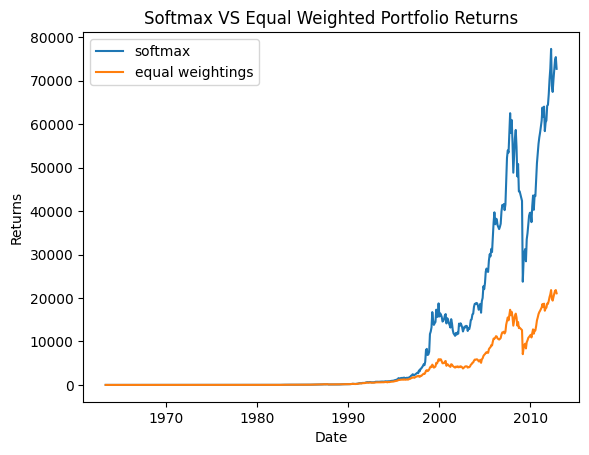

In [782]:
s1 = data1['Return Stream']
s2 = data2['Return Stream']

plt.plot(s1['Date'], s1['Returns'].cumprod(), label='softmax')
plt.plot(s2['Date'], s2['Returns'].cumprod(), label='equal weightings')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Softmax VS Equal Weighted Portfolio Returns')

<h3>3M, 6M, 12M, 12M-1 Strats Implemented</h2>

In [809]:
softmaxed_backtest_data = {strat: backtest_monthly_rebalancing_softmax_weight(mom_list[strat]) for strat in mom_list}

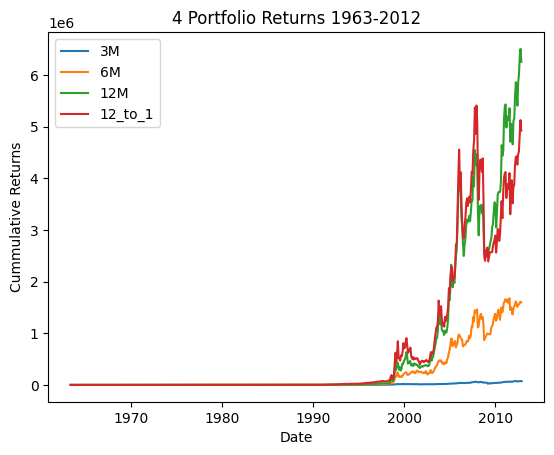

In [862]:
for strat in softmaxed_backtest_data:
    plt.plot(softmaxed_backtest_data[strat]['Return Stream']['Date'], softmaxed_backtest_data[strat]['Return Stream']['Returns'].cumprod(), label=strat)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Cummulative Returns')
    plt.title('4 Portfolio Returns 1963-2012')

In [860]:
for strat in softmaxed_backtest_data:
    #print(strat)
    print(softmaxed_backtest_data[strat]['Skewness'])
#print(softmaxed_backtest_data[strat]['Annual Highest Monthly Gain'].style.to_latex())


0.7036850564592394
1.5061303473313796
6.606278494322483
1.6899014507135455


<h1>Long-Short strategy does not work well since we are only working with current DJIA stocks</h1>

In [863]:

from datetime import datetime, timedelta

stock_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
def backtest_monthly_rebalancing_long_short(mom_streams):

    trading_strat_date = []
    trading_strat_returns = []

    end_date = datetime.strptime('2012-11-30', '%Y-%m-%d')
    
    current_date = datetime.strptime('1963-06-03', '%Y-%m-%d')
    
    trading_strat_date.append(current_date)
    trading_strat_returns.append(1.00)

    mom_tag = mom_streams['AAPL'].columns[1]

    last_top_3rd = []
    last_top_3rd_prices = {}
    last_top_3rd_date = None
    last_top_3rd_signal = {}

    #
    last_bottom_3rd = []
    last_bottom_3rd_prices = {}
    last_bottom_3rd_date = None
    last_bottom_3rd_signal = {}
    #

    while end_date > current_date:


        current_stocks_mom = {}
        no_info_count = 0

        for stock in mom_streams:
            temp_df = mom_streams[stock]
            if len(temp_df[temp_df['Date'] == current_date]) == 0:
                no_info_count += 1
            else:
                current_stocks_mom[stock] = temp_df[temp_df['Date'] == current_date].iloc[0][mom_tag]

        if no_info_count >= 24:
            current_date += timedelta(days=1)
            continue
        
        if last_top_3rd_prices or last_bottom_3rd_prices:
            curr_prices = {stock: None for stock in last_top_3rd_prices}
            for stock in curr_prices:
                tdf = stock_data[stock].reset_index()
                curr_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])
                
            #

            for stock in last_bottom_3rd_prices:
                tdf = stock_data[stock].reset_index()
                curr_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])
                
            return_stocksb = {stock: None for stock in last_bottom_3rd_prices}
            
            for stock in return_stocksb:
                return_stocksb[stock] = (curr_prices[stock] / last_bottom_3rd_prices[stock]) - 1
            #
            return_stocks = {stock: None for stock in last_top_3rd_prices}
            for stock in return_stocks:
                return_stocks[stock] = (curr_prices[stock] / last_top_3rd_prices[stock]) - 1

            trading_strat_date.append(current_date)

            total_returns = 0

            equivalent_weightings = []

            SOFTMAX_HARDNESS = 5 # the higher the softmax_hardness, the more disperse the output weightings will be
            
            #
            softmax_denominatorb = 0
            for stock in last_bottom_3rd_signal:
                softmax_denominatorb += pow(math.e, (1 + abs(last_bottom_3rd_signal[stock])) * SOFTMAX_HARDNESS)

            #
            
            softmax_denominator = 0
            for stock in last_top_3rd_signal:
                softmax_denominator += pow(math.e, (1 + last_top_3rd_signal[stock]) * SOFTMAX_HARDNESS)
            
            #
            for stock in return_stocksb:
                total_returns -= ( pow(math.e, (1 + abs(last_bottom_3rd_signal[stock])) * SOFTMAX_HARDNESS) / softmax_denominatorb ) * return_stocksb[stock] / 2
            #print(total_returns)
            #
            #for stock in return_stocks:
                #total_returns += ( pow(math.e, (1 + last_top_3rd_signal[stock]) * SOFTMAX_HARDNESS) / softmax_denominator ) * return_stocks[stock] / 2
            
            #for stock in return_stocks:
                #total_returns += ( 1/len(return_stocks) ) * return_stocks[stock]

            trading_strat_returns.append( (total_returns + 1) )


            last_top_3rd = []
            last_top_3rd_prices = {}
            last_top_3rd_date = None
            last_top_3rd_signal = {}
            
            #
            last_bottom_3rd = []
            last_bottom_3rd_prices = {}
            last_bottom_3rd_date = None
            last_bottom_3rd_signal = {}
            #

        #
        bottom_3rd_stocks = []
        temp_sorted_dictb = dict(sorted(current_stocks_mom.items(), key=lambda item: item[1]))
        stocks_to_popb = []
        for stock in temp_sorted_dictb:
            if temp_sorted_dictb[stock] > 0:
                stocks_to_popb.append(stock)
                
        for stock in stocks_to_popb:
            temp_sorted_dictb.pop(stock)

        descending_mom_stocks = list(temp_sorted_dictb.keys())
        count_of_stocks = len(descending_mom_stocks)
        
        for _ in range(count_of_stocks - count_of_stocks // 3):
            descending_mom_stocks.pop(len(descending_mom_stocks) - 1)
        
        last_bottom_3rd = descending_mom_stocks
        last_bottom_3rd_date = current_date
        last_bottom_3rd_signal = {stock: float(temp_sorted_dictb[stock]) for stock in last_bottom_3rd}
        #print(last_bottom_3rd_signal)

        for stock in last_bottom_3rd:
            tdf = stock_data[stock].reset_index()
            last_bottom_3rd_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])
        
        # 
        top_3rd_stocks = []
        temp_sorted_dict = dict(sorted(current_stocks_mom.items(), key=lambda item: item[1]))
        stocks_to_pop = []
        for stock in temp_sorted_dict:
            if temp_sorted_dict[stock] < 0:
                stocks_to_pop.append(stock)

        for stock in stocks_to_pop:
            temp_sorted_dict.pop(stock)

        ascending_mom_stocks = list(temp_sorted_dict.keys())
        #print(ascending_mom_stocks)
        count_of_stocks = len(ascending_mom_stocks)

        for _ in range(count_of_stocks - count_of_stocks // 3):
            ascending_mom_stocks.pop(0)
        
        last_top_3rd = ascending_mom_stocks
        last_top_3rd_date = current_date
        last_top_3rd_signal = {stock: float(temp_sorted_dict[stock]) for stock in last_top_3rd}
        #print(str(last_top_3rd_signal) + "\n------\n")

        
        for stock in last_top_3rd:
            tdf = stock_data[stock].reset_index()
            last_top_3rd_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])

        current_date += timedelta(days=31)

    tdf = pd.DataFrame({'Date': trading_strat_date, 'Returns': trading_strat_returns})
    #tdf = tdf.drop('Reversed Returns', axis = 1)
    data = {}
    
    #data['Return Stream'].drop('Reversed Returns', axis=1)
    data['Mean Return'] = get_annualized_mean_return(tdf)
    data['Volatility'] = get_annualized_vol(tdf)
    data['Sharpe Ratio'] = get_sharpe_ratio(tdf)
    data['Hit Rate'] = get_hit_rate(tdf)
    data['Max Drawdown'] = get_max_drawdown(tdf)
    data['Annual Highest Monthly Gain'] = get_highest_monthly_gain(tdf)
    data['Annual Highest Monthly Loss'] = get_highest_monthly_loss(tdf)
    data['Skewness'] = get_skew(tdf)
    data['Kurtosis'] = get_kurtosis(tdf)
    data['Return Stream'] = tdf
    data['Return Stream'] = data['Return Stream'].drop('Reversed Returns', axis=1)
    return data
    #return tdf



In [866]:
a = backtest_monthly_rebalancing_long_short(mom_list['3M'])
b = backtest_monthly_rebalancing_softmax_weight(mom_list['3M'])

In [867]:
print(a['Return Stream']['Returns'].cumprod().iloc[-1])
print(b['Return Stream']['Returns'].cumprod().iloc[-1])

0.004648482819759886
72703.16616420749


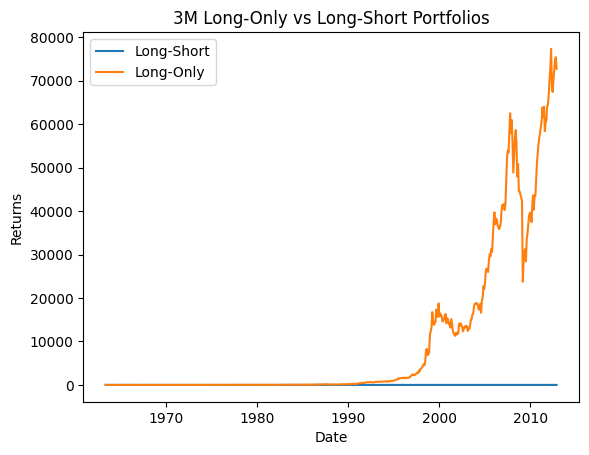

In [872]:
plt.plot(a['Return Stream']['Date'], a['Return Stream']['Returns'].cumprod(), label='Long-Short')
plt.plot(b['Return Stream']['Date'], b['Return Stream']['Returns'].cumprod(), label='Long-Only')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('3M Long-Only vs Long-Short Portfolios')
plt.legend()

<h1>Relationship between momentum and future returns</h1>

In [704]:
from datetime import datetime, timedelta
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
stock_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))

def mom_returns_regression(mom_stream, stock):
    #stock = 'MSFT'

    mom_signal = []
    returns = []
    mom_key = mom_stream[stock].iloc[0].keys()[1]
    for idx in range(50, len(mom_stream[stock]) - 180):
        curr_date = mom_stream[stock].iloc[idx]['Date']
        mom_signal.append(mom_stream[stock].iloc[idx][mom_key])

        future_date = mom_stream[stock].iloc[idx]['Date'] + timedelta(days=31)

        tdf = stock_data[stock]
        tdf = tdf.reset_index()
        lmt = 0
        future_date_modified = f'{future_date: %Y-%m-%d}'
        while len(tdf[tdf['Date'] == future_date_modified]) == 0:
            lmt +=1
            future_date += timedelta(days=1)
            future_date_modified = f'{future_date: %Y-%m-%d}'
            if lmt > 4:
                break;
        if lmt > 4:
            mom_signal.pop()
            continue

        curr_return = float(tdf[tdf['Date'] == f'{future_date: %Y-%m-%d}']['Close']) / float(tdf[tdf['Date'] == f'{curr_date: %Y-%m-%d}']['Close']) - 1
        
        returns.append(curr_return)

    df = pd.DataFrame({'Momentum': mom_signal, 'Returns': returns})
    return df
    
    # mom   returns
    # 0     1-0
    # 1     2-1
    # 2     3-2
    # 3     4-3
    # final final+1 - final

In [705]:
mom_return_regressions = {stock: mom_returns_regression(mom_list['12_to_1'], stock) for stock in mom_list['12_to_1']}
#a = mom_returns_regression(mom_list['3M'], 'MSFT')

MSFT slope: 0.014612464683103567
MSFT intercept: 0.017098920294389166

AAPL slope: -0.007267785442217522
AAPL intercept: 0.02755811430971369

AMZN slope: 0.0002516661967223032
AMZN intercept: 0.023030762085356486

JPM slope: -0.015300874900115894
JPM intercept: 0.016393776098350975

WMT slope: 0.013878660330851604
WMT intercept: 0.015383184606428344

V slope: -0.006788965290371123
V intercept: 0.019179334951868698

UNH slope: 0.014853653302087768
UNH intercept: 0.018104180758215495

PG slope: 0.0012667835188107752
PG intercept: 0.010964100160625968

JNJ slope: 0.003216725666885927
JNJ intercept: 0.01199959828253125

HD slope: 0.0020082612944256496
HD intercept: 0.018086476279993737

MRK slope: 0.016625639347518158
MRK intercept: 0.010128115948605044

CVX slope: -0.0027268652889618035
CVX intercept: 0.011154546496132851

KO slope: 0.012846570063623157
KO intercept: 0.010037087333817824

CRM slope: -0.020548632979217205
CRM intercept: 0.02819576286014029

CSCO slope: 0.028257816203172914

/var/folders/g4/nkqfkd8d2b74d6t74ks8yp780000gn/T/ipykernel_78636/469423422.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


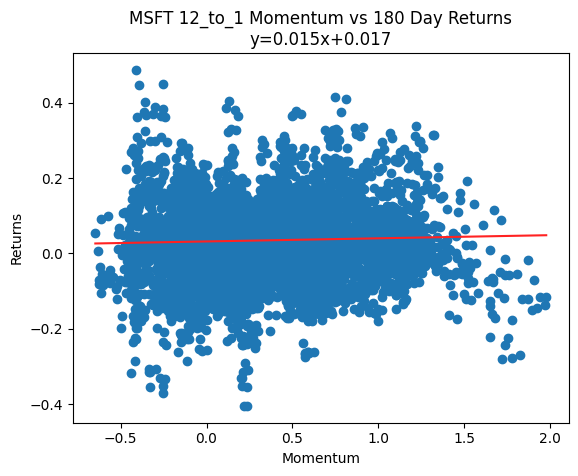

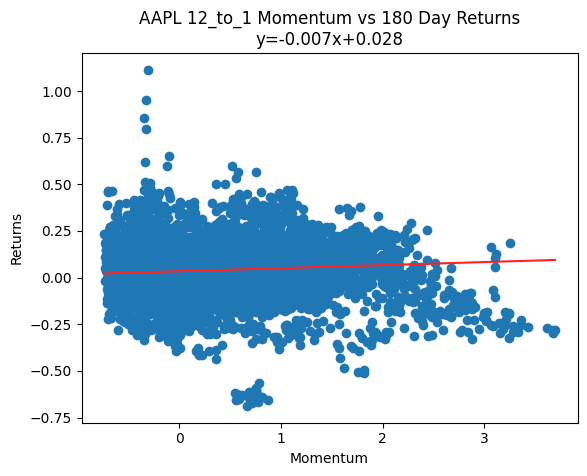

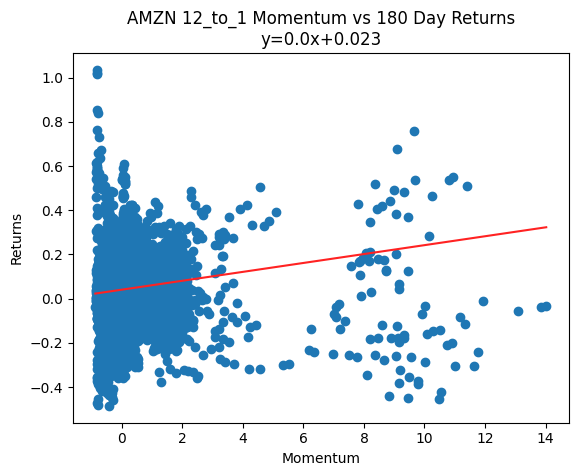

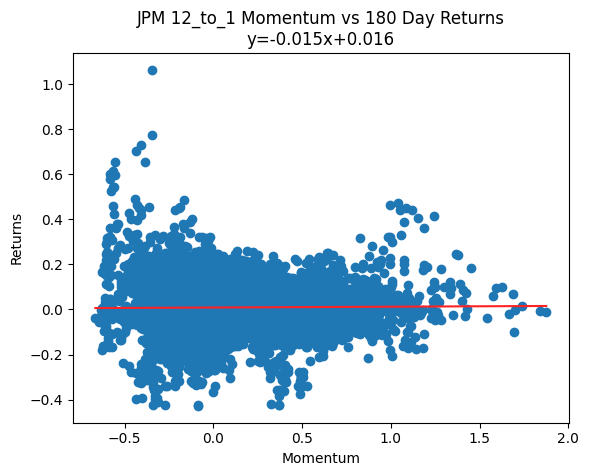

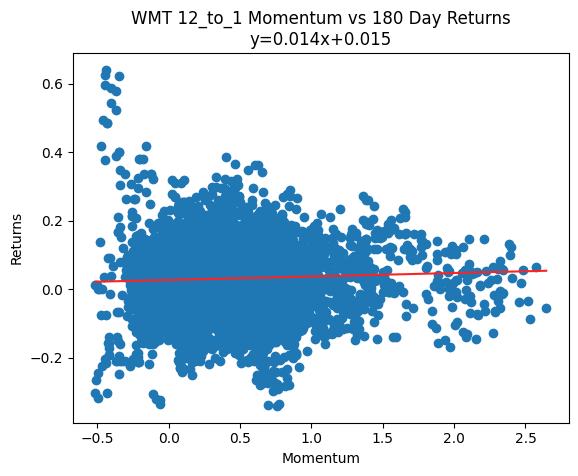

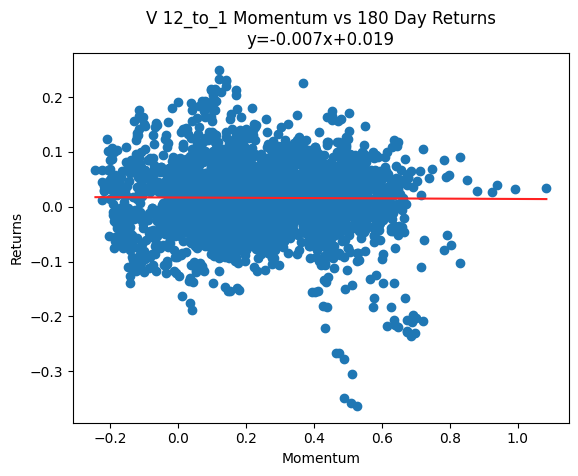

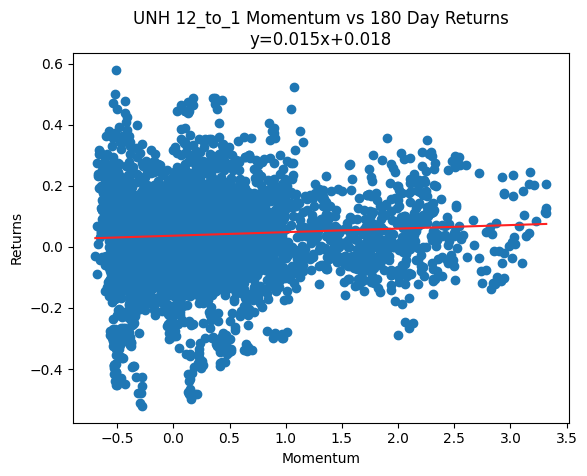

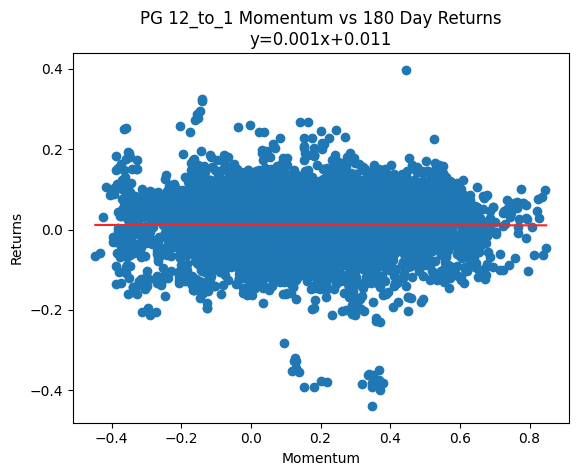

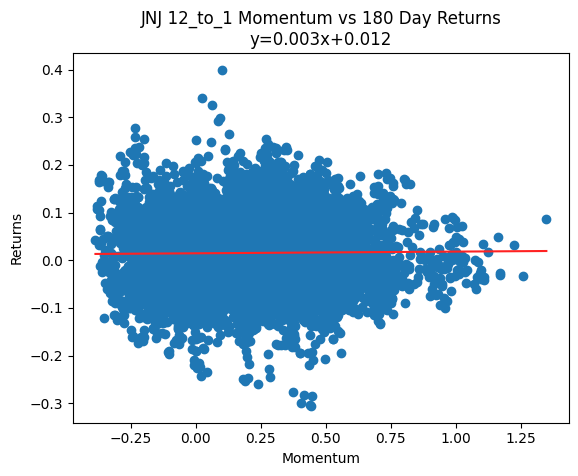

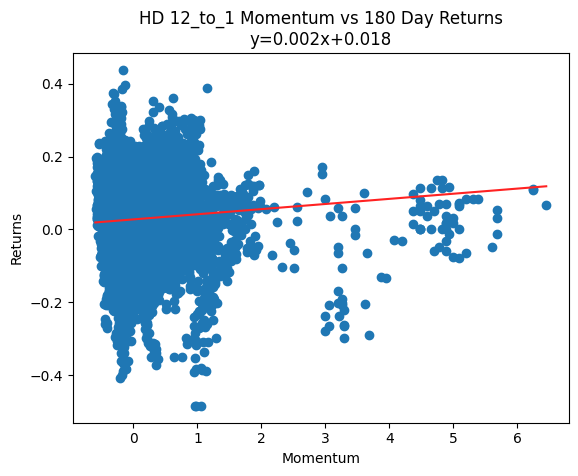

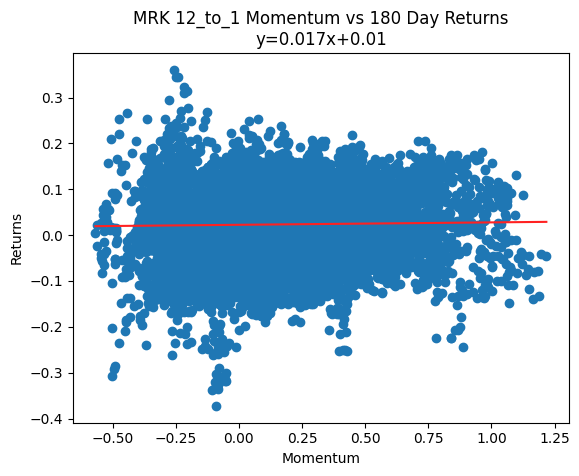

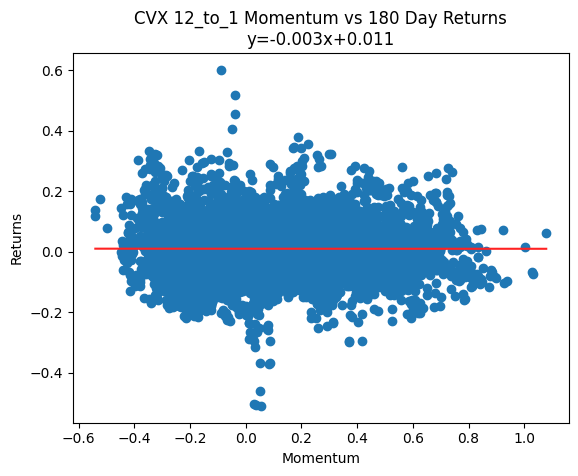

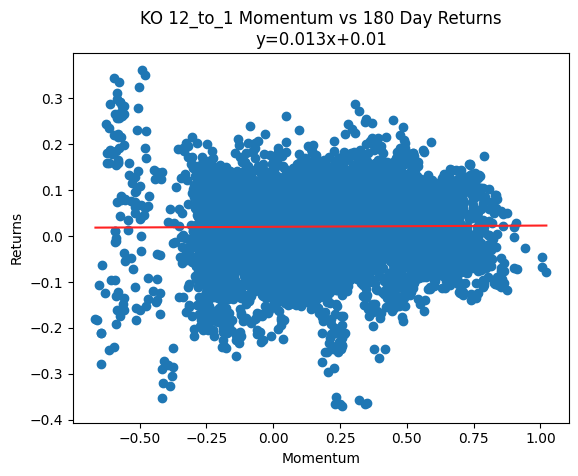

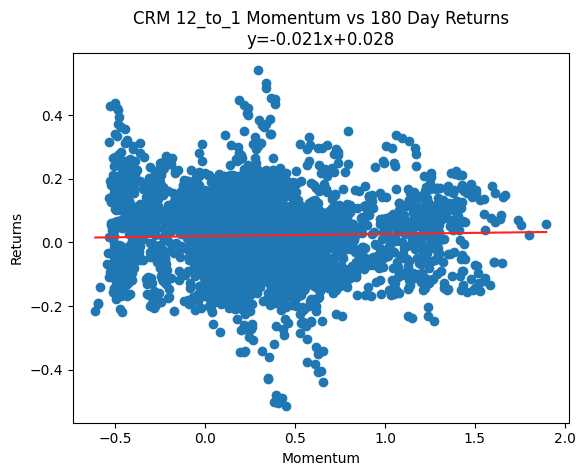

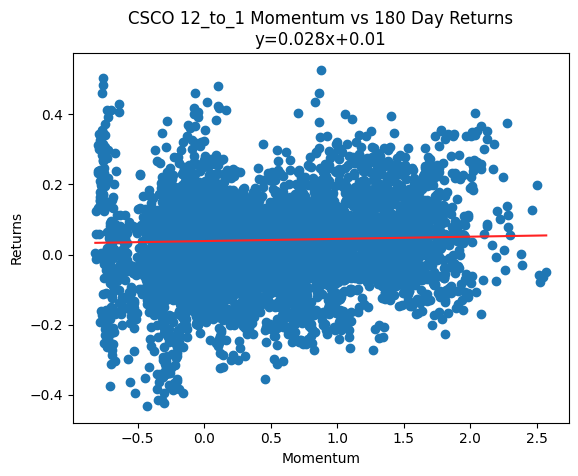

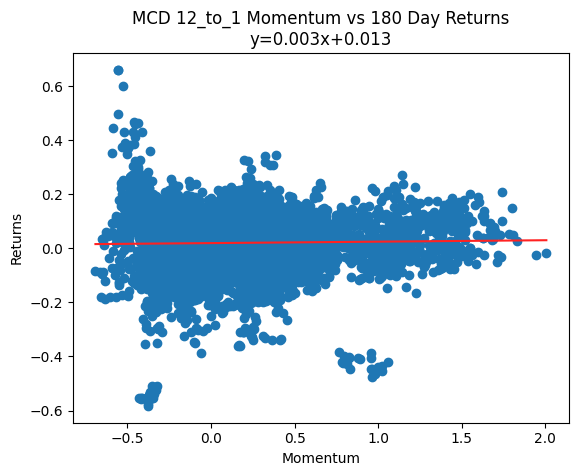

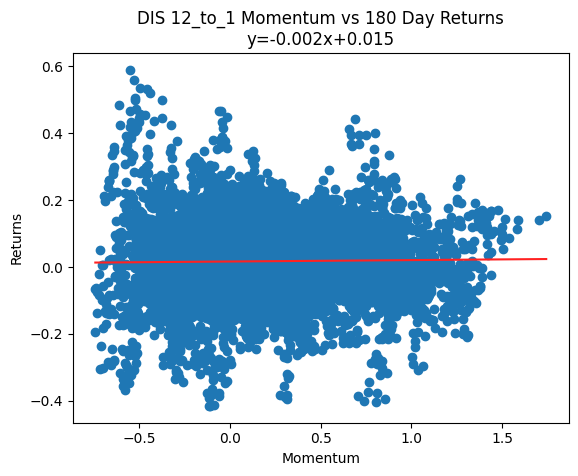

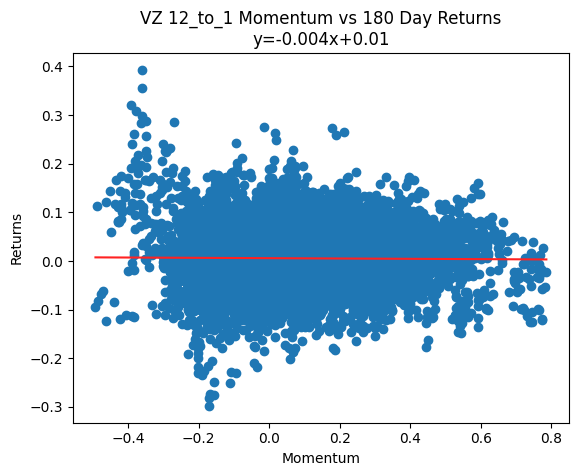

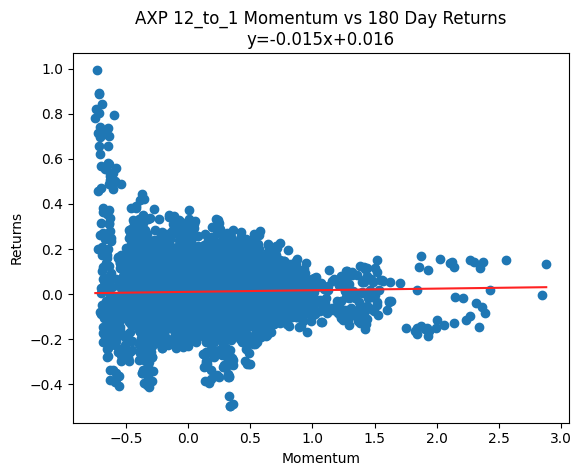

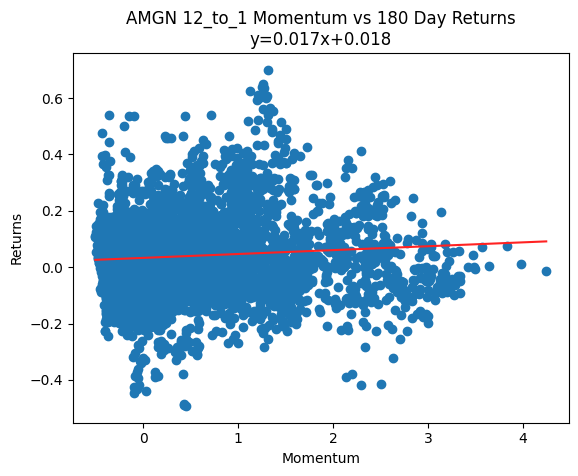

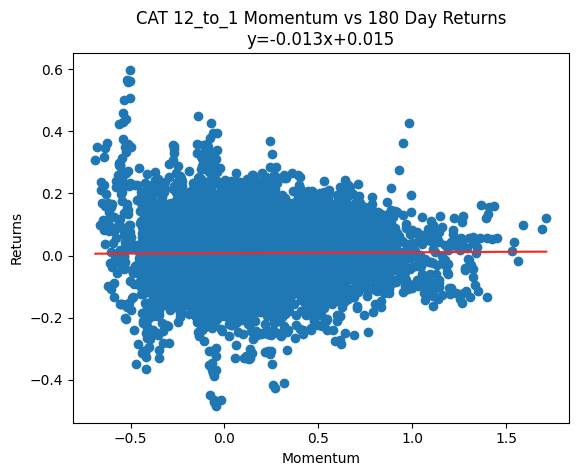

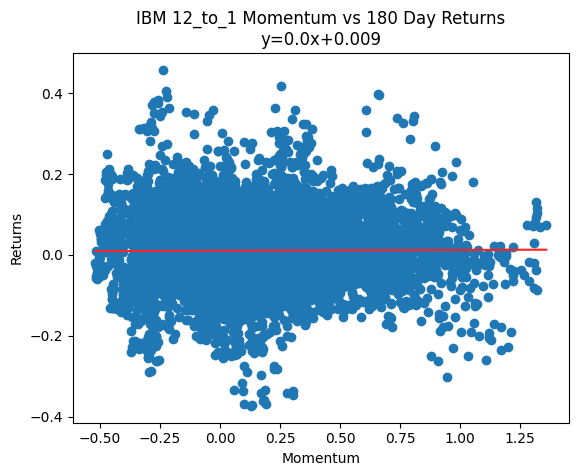

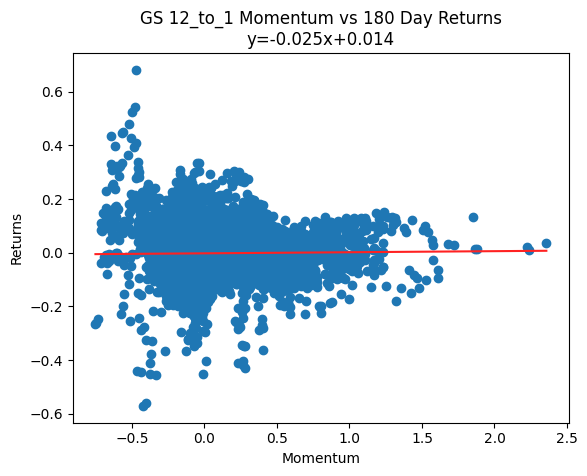

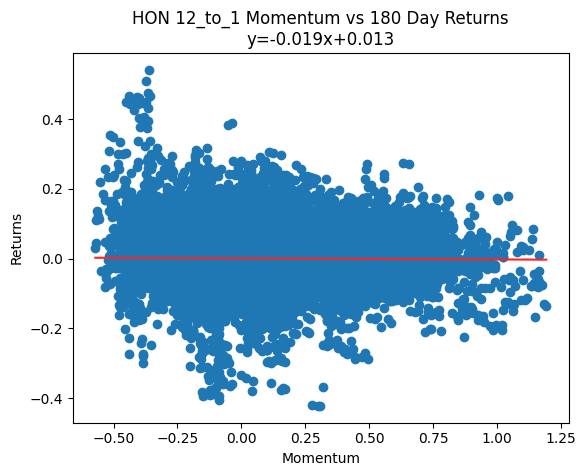

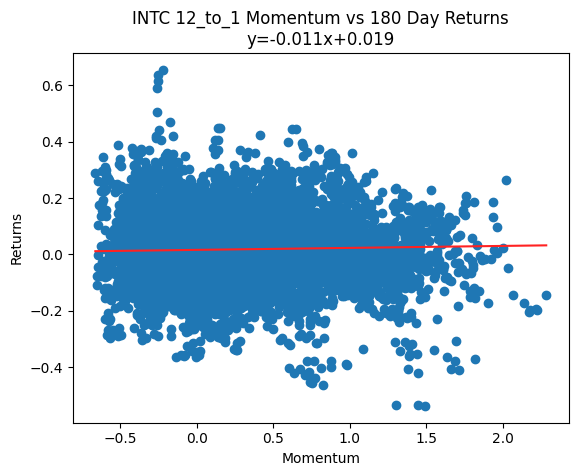

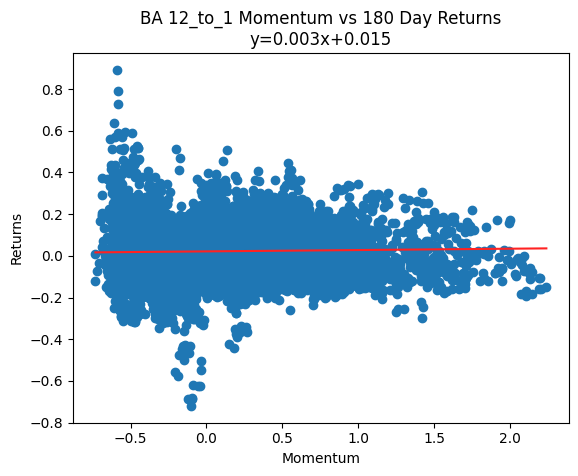

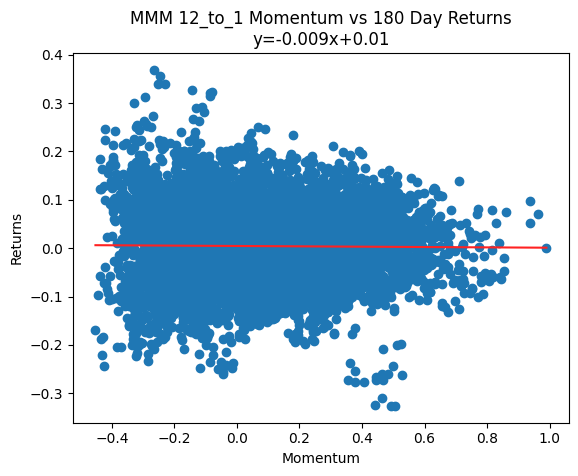

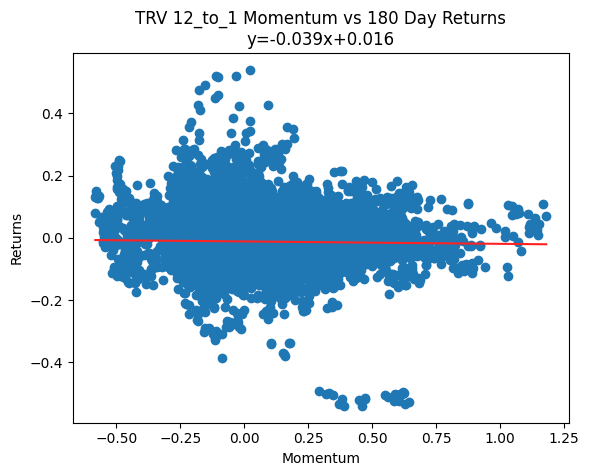

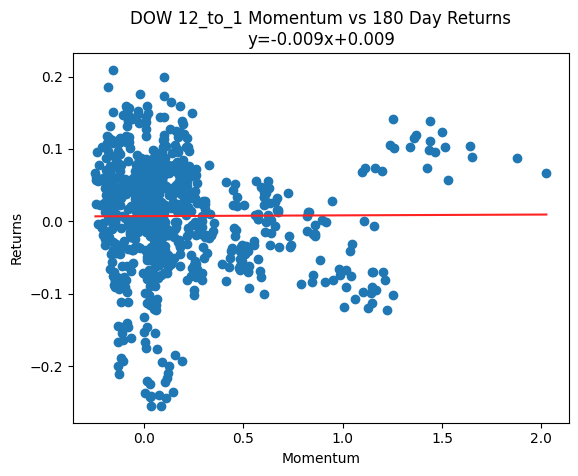

In [748]:
import numpy as np

for stock in mom_return_regressions:
    df = mom_return_regressions[stock]
    slope, intercept = np.polyfit(df['Momentum'], df['Returns'], deg=1)
    print(f'{stock} slope: {slope}')
    print(f'{stock} intercept: {intercept}')
    print()
    fig, ax = plt.subplots()

    min_x = df['Momentum'].min()
    max_x = df['Momentum'].max()
    
    plt.scatter(df['Momentum'], df['Returns'])
    #plt.plot([0, intercept], [1, intercept + slope])
    plt.plot([min_x,max_x], [intercept -min_x*slope,slope + max_x*intercept], color='#ff2222')
    plt.title(f'{stock} 12_to_1 Momentum vs 180 Day Returns\ny={round(slope,3)}x+{round(intercept,3)}')
    plt.xlabel('Momentum')
    plt.ylabel('Returns')

MSFT slope: 0.014612464683103567
MSFT intercept: 0.017098920294389166


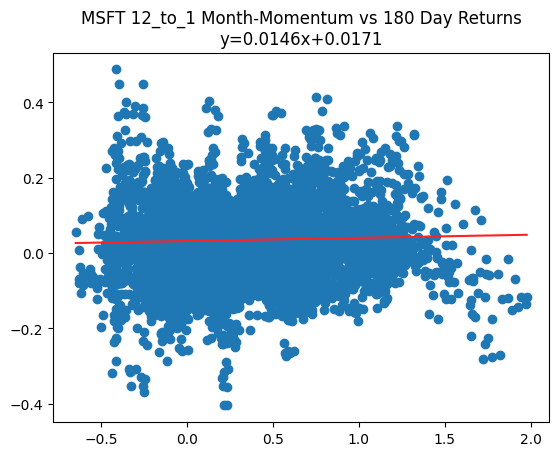

AAPL slope: -0.007267785442217522
AAPL intercept: 0.02755811430971369


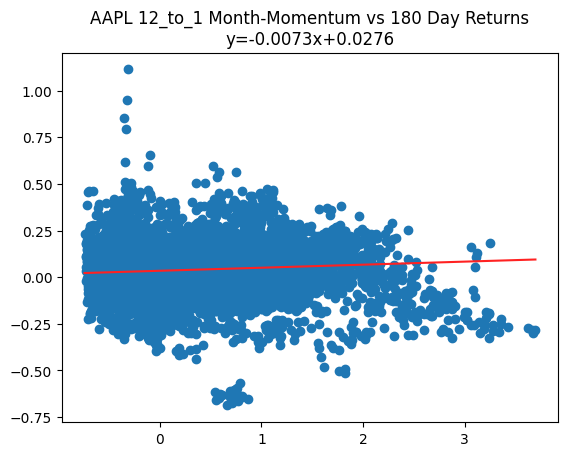

AMZN slope: 0.0002516661967223032
AMZN intercept: 0.023030762085356486


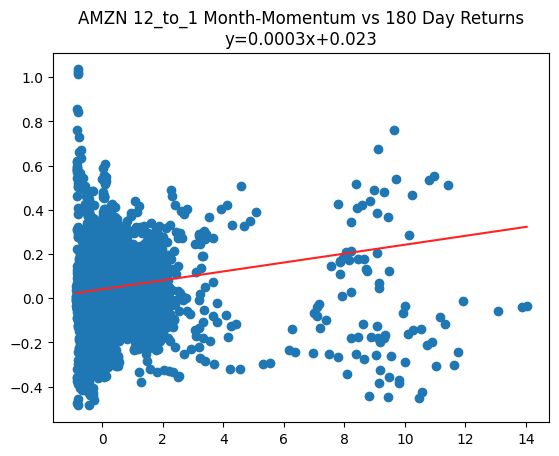

JPM slope: -0.015300874900115894
JPM intercept: 0.016393776098350975


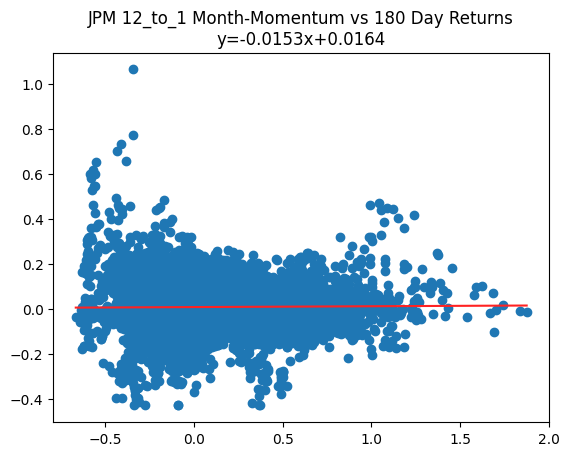

WMT slope: 0.013878660330851604
WMT intercept: 0.015383184606428344


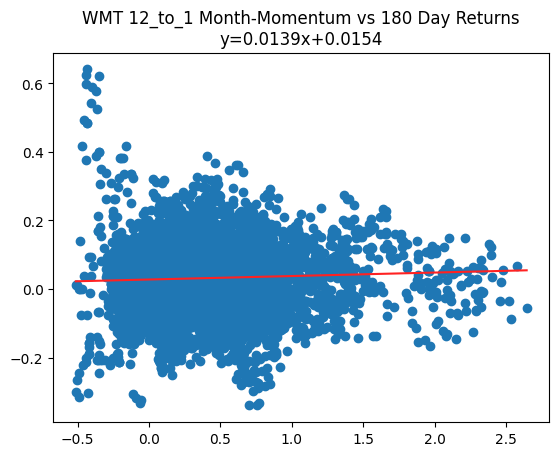

V slope: -0.006788965290371123
V intercept: 0.019179334951868698


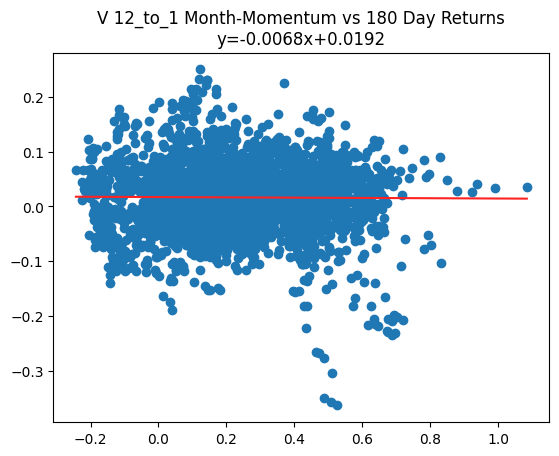

UNH slope: 0.014853653302087768
UNH intercept: 0.018104180758215495


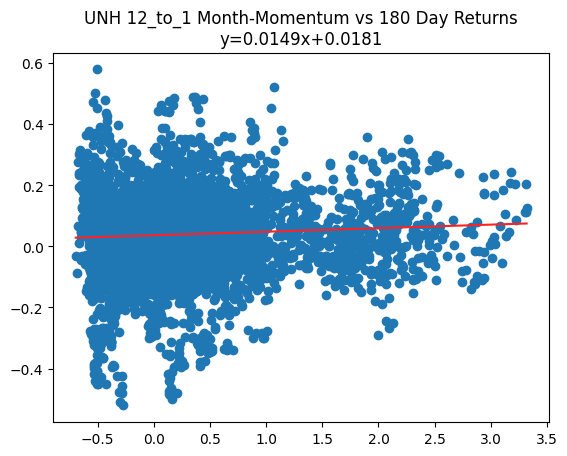

PG slope: 0.0012667835188107752
PG intercept: 0.010964100160625968


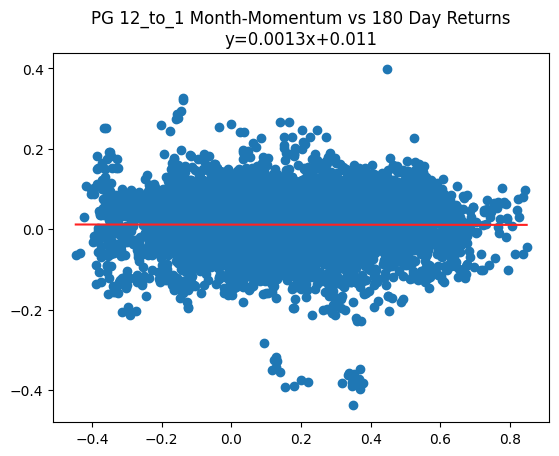

JNJ slope: 0.003216725666885927
JNJ intercept: 0.01199959828253125


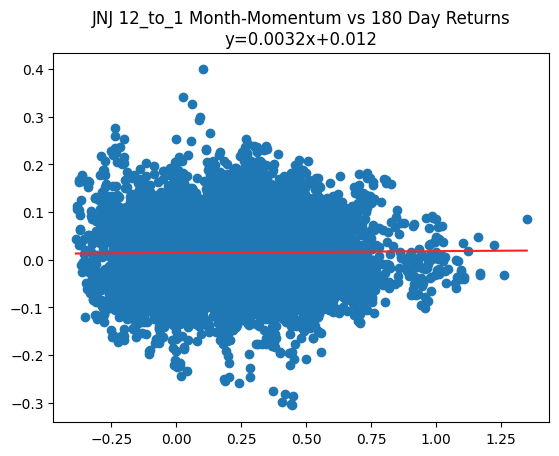

HD slope: 0.0020082612944256496
HD intercept: 0.018086476279993737


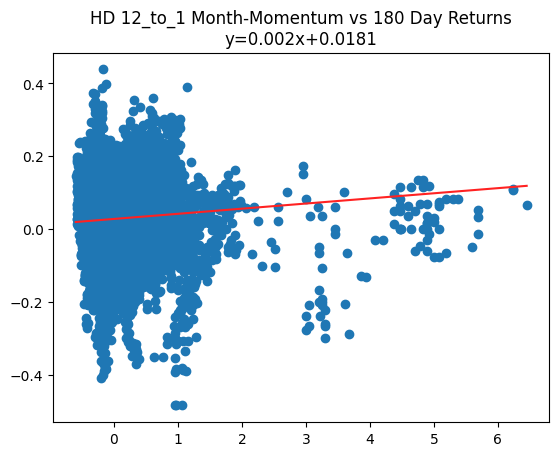

MRK slope: 0.016625639347518158
MRK intercept: 0.010128115948605044


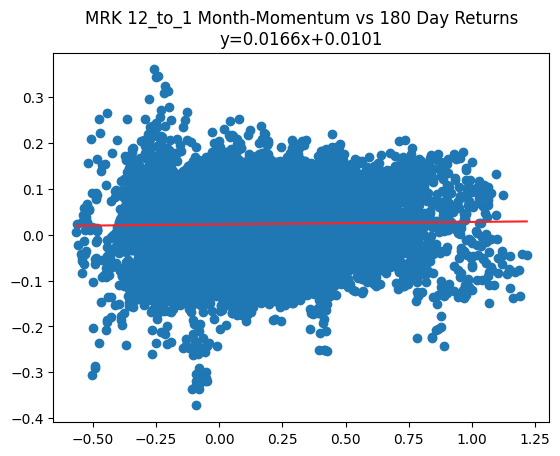

CVX slope: -0.0027268652889618035
CVX intercept: 0.011154546496132851


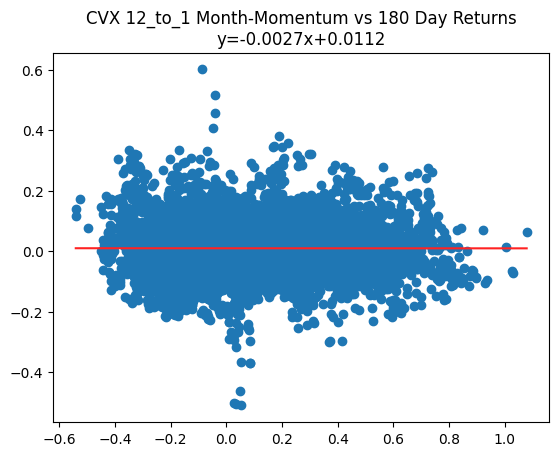

KO slope: 0.012846570063623157
KO intercept: 0.010037087333817824


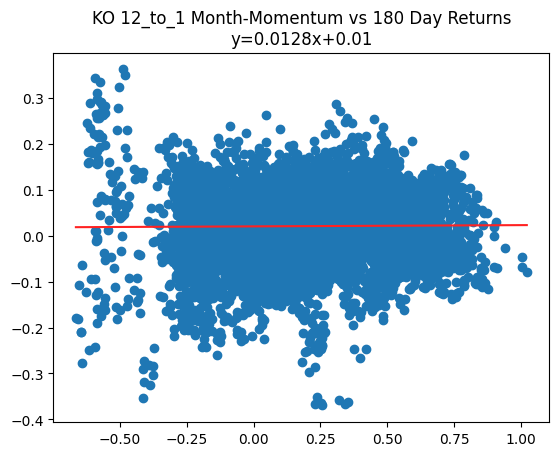

CRM slope: -0.020548632979217205
CRM intercept: 0.02819576286014029


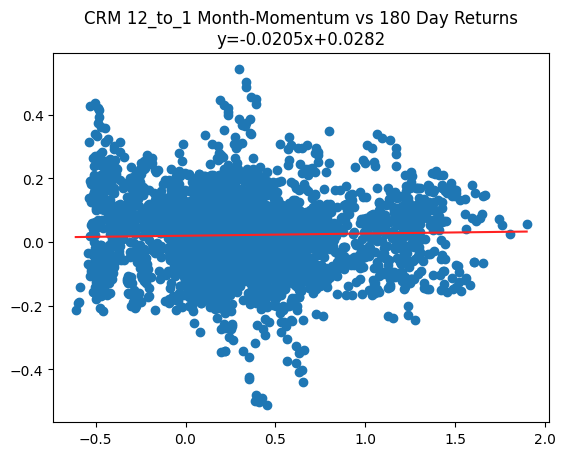

CSCO slope: 0.028257816203172914
CSCO intercept: 0.010201002793005358


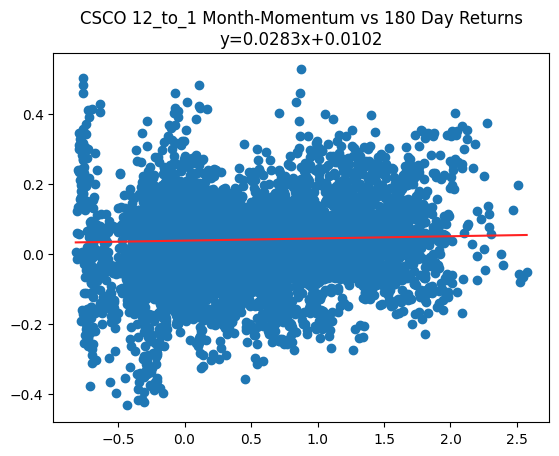

MCD slope: 0.003371501660230099
MCD intercept: 0.013157700515216881


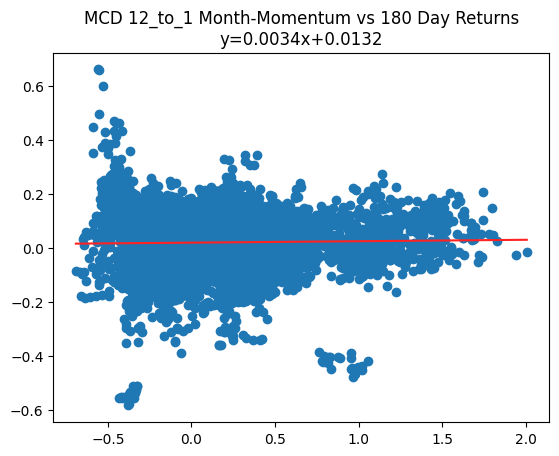

DIS slope: -0.002211922504201415
DIS intercept: 0.01491210250274653


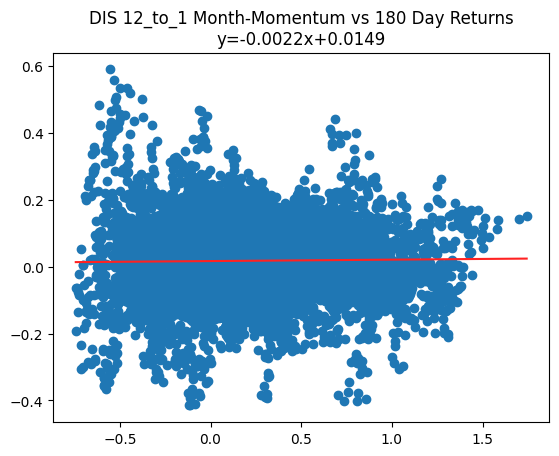

VZ slope: -0.004311546576325462
VZ intercept: 0.009557727207269395


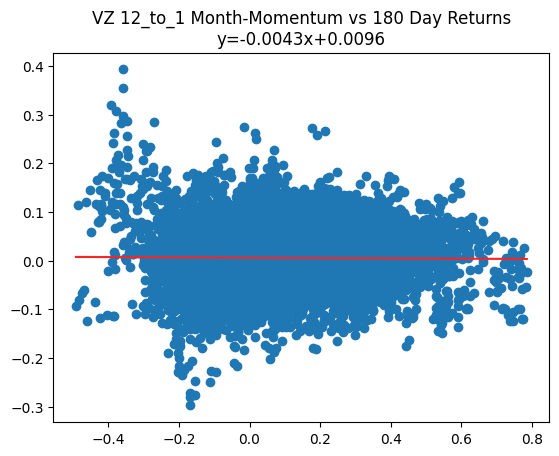

AXP slope: -0.015215938352385463
AXP intercept: 0.015939046815121375


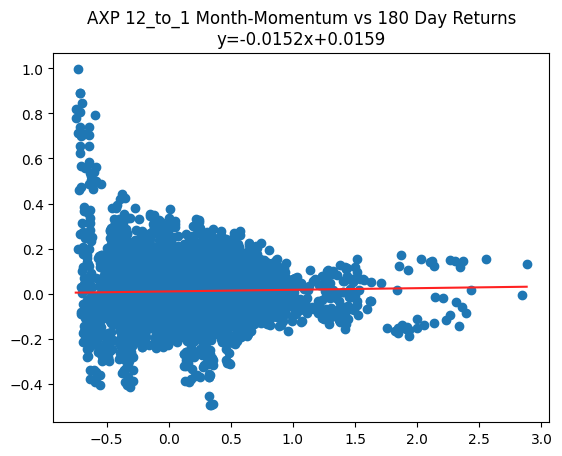

AMGN slope: 0.017142215653798136
AMGN intercept: 0.017540954816494786


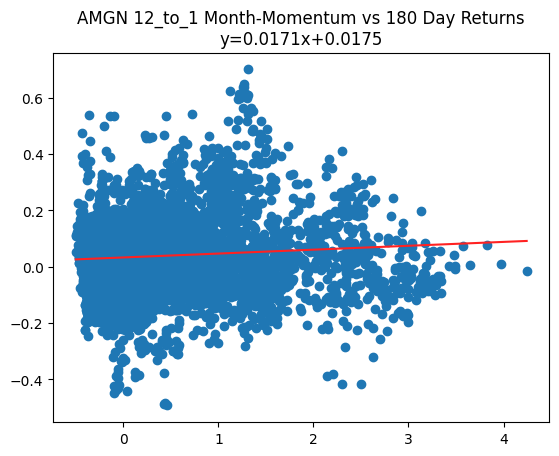

CAT slope: -0.01268590967758185
CAT intercept: 0.01474817530011228


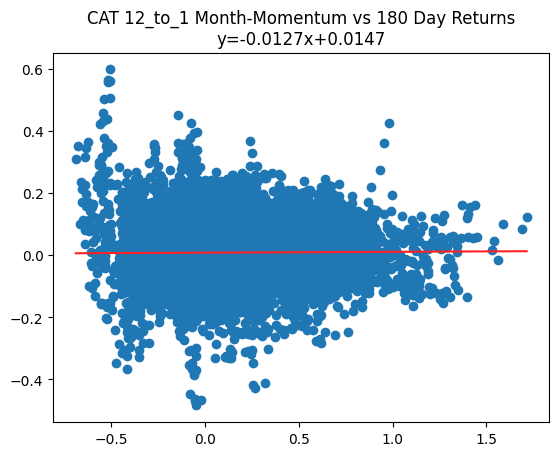

IBM slope: 0.00034015434940791445
IBM intercept: 0.009370729422648343


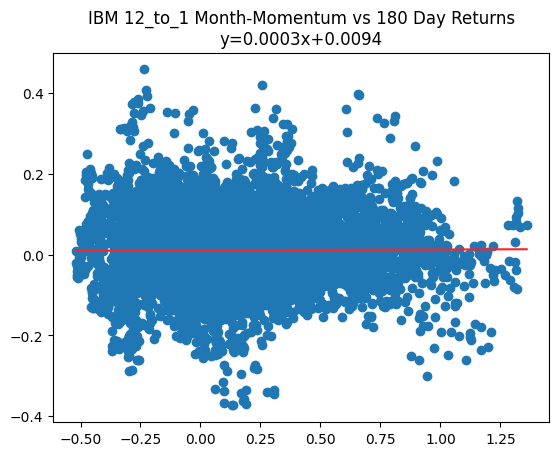

GS slope: -0.0252446998115258
GS intercept: 0.013836257371959588


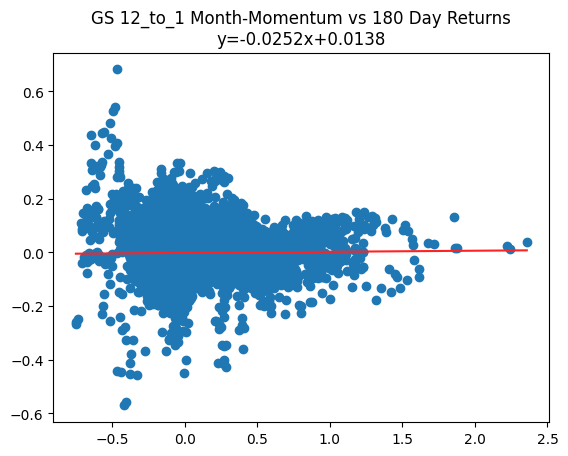

HON slope: -0.018540922336754546
HON intercept: 0.012979274193182335


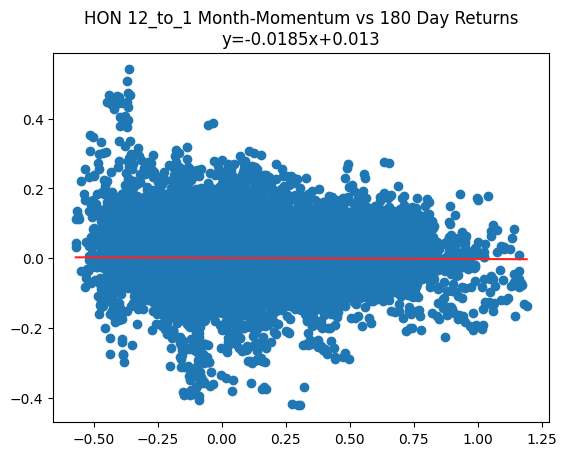

INTC slope: -0.011261115321310923
INTC intercept: 0.019060988188691508


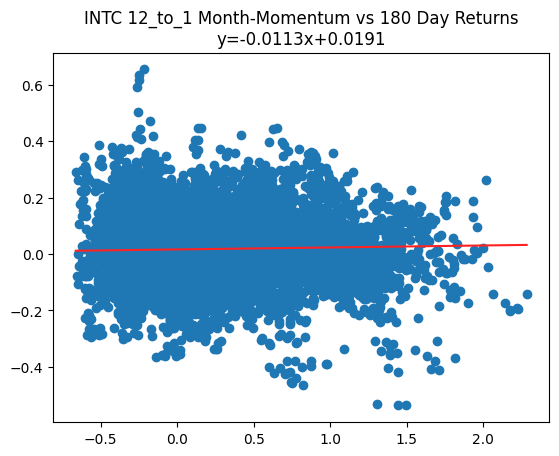

BA slope: 0.0026053249498139645
BA intercept: 0.014800827765057858


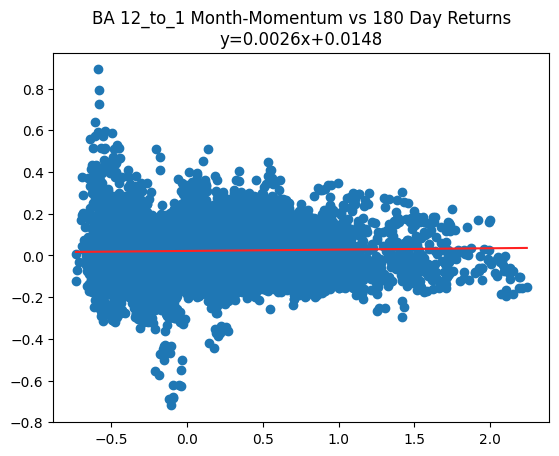

MMM slope: -0.009271028467293272
MMM intercept: 0.01036259354566664


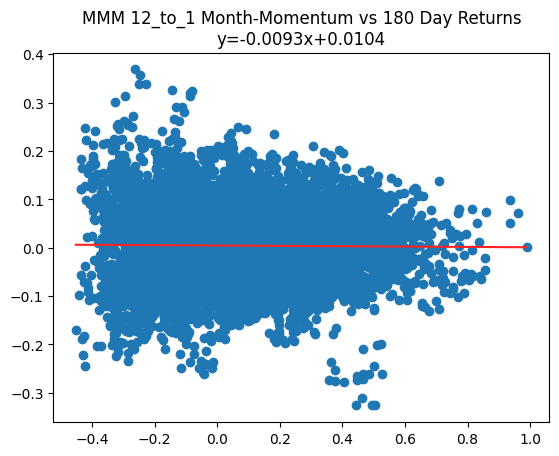

TRV slope: -0.03921354338833278
TRV intercept: 0.015748588712624696


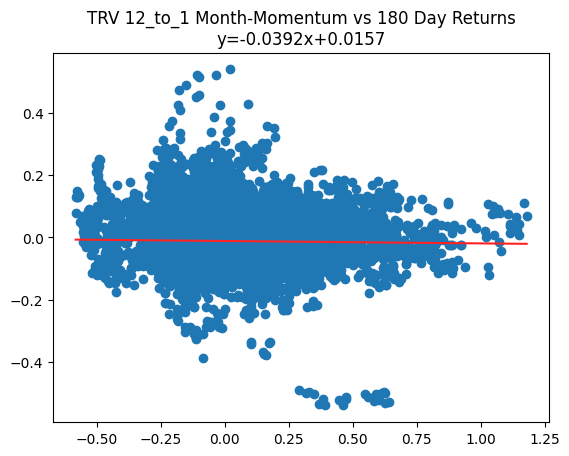

DOW slope: -0.008899063120596375
DOW intercept: 0.008971282639980531


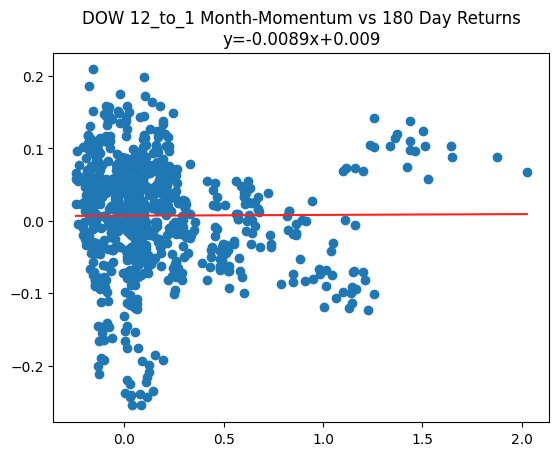

In [ ]:
 Month-Momentum vs 180 Day Returns\ny={round(slope,4)}x+{round(intercept, 4)}')
    plt.show()